# **`Income Prediction Challenge For Azubian`**

# `1. Business Understaning`

Income inequality - when income is distributed in an uneven manner among a population - is a growing problem in developing nations across the world. With the rapid rise of AI and worker automation, this problem could continue to grow if steps are not taken to address the issue.

The objective of this challenge is to create a machine learning model to predict whether an individual earns above or below a certain amount.

This solution can potentially reduce the cost and improve the accuracy of monitoring key population indicators such as income level in between census years. This information will help policymakers to better manage and avoid income inequality globally.

The error metric for this project is the F1 score, which ranges from 0 (total failure) to 1 (perfect score). Hence, the closer the score is to 1, the better the model.

**F1 Score:** A performance score that combines both precision and recall. It is a harmonic mean of these two variables. Formula is given as: 2*Precision*Recall/(Precision + Recall)

**Precision:** This is an indicator of the number of items correctly identified as positive out of total items identified as positive. Formula is given as: TP/(TP+FP)

**Recall / Sensitivity / True Positive Rate (TPR):** This is an indicator of the number of items correctly identified as positive out of total actual positives. Formula is given as: TP/(TP+FN)

Where:  

TP=True Positive  
FP=False Positive  
TN=True Negative  
FN=False Negative

## **Analytical Questions**
1. Deos race influence the income limits a person can achieve?
2. Does age affect the income limits achievable by and individual?
3. How does gender impact income levels?
4. Is there a relationship between citizenship and income limits?
5. How are income limits distributed across different tax status categories?

## **Hypothesis**
H0 - Level of education does not affect the income limits of an individual  
H1 - Level of education significantly affects the income limits of an individual

# `2. Data Understanding`

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (LabelEncoder, OneHotEncoder, 
                                   RobustScaler)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold

import joblib
import os


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc



from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings("ignore")


## **Data Loading**

In [2]:
# Load data
df = pd.read_csv('Data\Income Prediction Train Data.csv')

df.head(5)

ID  age   gender               education                class  \
0  ID_TZ0000   79   Female    High school graduate                  NaN   
1  ID_TZ0001   65   Female    High school graduate                  NaN   
2  ID_TZ0002   21     Male   12th grade no diploma   Federal government   
3  ID_TZ0003    2   Female                Children                  NaN   
4  ID_TZ0004   70     Male    High school graduate                  NaN   

  education_institute                    marital_status  \
0                 NaN                           Widowed   
1                 NaN                           Widowed   
2                 NaN                     Never married   
3                 NaN                     Never married   
4                 NaN   Married-civilian spouse present   

                         race is_hispanic      employment_commitment  ...  \
0                       White   All other         Not in labor force  ...   
1                       White   All other   Children or Armed Forces  ...   
2                       Black   All other   Children or Armed Forces  ...   
3   Asian or Pacific Islander   All other   Children or Armed Forces  ...   
4                       White   All other         Not in labor force  ...   

  country_of_birth_mother  migration_code_change_in_msa  \
0                      US                             ?   
1                      US                     unchanged   
2                      US                     unchanged   
3                   India                     unchanged   
4                      US                             ?   

   migration_prev_sunbelt migration_code_move_within_reg  \
0                       ?                              ?   
1                     NaN                      unchanged   
2                     NaN                      unchanged   
3                     NaN                      unchanged   
4                       ?                              ?   

   migration_code_change_in_reg  residence_1_year_ago old_residence_reg  \
0                             ?                   NaN               NaN   
1                     unchanged                  Same               NaN   
2                     unchanged                  Same               NaN   
3                     unchanged                  Same               NaN   
4                             ?                   NaN               NaN   

   old_residence_state importance_of_record  income_above_limit  
0                  NaN              1779.74         Below limit  
1                  NaN              2366.75         Below limit  
2                  NaN              1693.42         Below limit  
3                  NaN              1380.27         Below limit  
4                  NaN              1580.79         Below limit  

[5 rows x 43 columns]

In [3]:
# Get sample
df.sample(5).T

20844  \
ID                                               ID_TZ117877   
age                                                       76   
gender                                                Female   
education                                         11th grade   
class                                                    NaN   
education_institute                                      NaN   
marital_status                                       Widowed   
race                                                   Black   
is_hispanic                                        All other   
employment_commitment                     Not in labor force   
unemployment_reason                                      NaN   
employment_stat                                            0   
wage_per_hour                                              0   
is_labor_union                                           NaN   
working_week_per_year                                      0   
industry_code                                              0   
industry_code_main               Not in universe or children   
occupation_code                                            0   
occupation_code_main                                     NaN   
total_employed                                             0   
household_stat                         Nonfamily householder   
household_summary                                Householder   
under_18_family                                          NaN   
veterans_admin_questionnaire                             NaN   
vet_benefit                                                2   
tax_status                                          Nonfiler   
gains                                                      0   
losses                                                     0   
stocks_status                                              0   
citizenship                                           Native   
mig_year                                                  95   
country_of_birth_own                                      US   
country_of_birth_father                                   US   
country_of_birth_mother                                   US   
migration_code_change_in_msa                               ?   
migration_prev_sunbelt                                     ?   
migration_code_move_within_reg                             ?   
migration_code_change_in_reg                               ?   
residence_1_year_ago                                     NaN   
old_residence_reg                                        NaN   
old_residence_state                                      NaN   
importance_of_record                                 1656.04   
income_above_limit                               Below limit   

                                                                   14473  \
ID                                                           ID_TZ112137   
age                                                                   30   
gender                                                            Female   
education                         Prof school degree (MD DDS DVM LLB JD)   
class                                                            Private   
education_institute                                                  NaN   
marital_status                                             Never married   
race                                           Asian or Pacific Islander   
is_hispanic                                                    All other   
employment_commitment                           Children or Armed Forces   
unemployment_reason                                                  NaN   
employment_stat                                                        0   
wage_per_hour                                                          0   
is_labor_union                                                        No   
working_week_per_year                                                 52   
industry_code         

In [4]:
# Get shape
df.shape

(209499, 43)

In [5]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [6]:
# Describe the data
df.describe().T

count         mean          std    min      25%  \
age                    209499.0    34.518728    22.306738   0.00    15.00   
employment_stat        209499.0     0.176760     0.555562   0.00     0.00   
wage_per_hour          209499.0    55.433487   276.757327   0.00     0.00   
working_week_per_year  209499.0    23.158850    24.397963   0.00     0.00   
industry_code          209499.0    15.332398    18.049655   0.00     0.00   
occupation_code        209499.0    11.321734    14.460839   0.00     0.00   
total_employed         209499.0     1.956067     2.365154   0.00     0.00   
vet_benefit            209499.0     1.515854     0.850853   0.00     2.00   
gains                  209499.0   435.926887  4696.359500   0.00     0.00   
losses                 209499.0    36.881737   270.383302   0.00     0.00   
stocks_status          209499.0   194.533420  1956.375501   0.00     0.00   
mig_year               209499.0    94.499745     0.500001  94.00    94.00   
importance_of_record   209499.0  1740.888324   995.559557  37.87  1061.29   

                           50%      75%      max  
age                      33.00    50.00     90.0  
employment_stat           0.00     0.00      2.0  
wage_per_hour             0.00     0.00   9999.0  
working_week_per_year     8.00    52.00     52.0  
industry_code             0.00    33.00     51.0  
occupation_code           0.00    26.00     46.0  
total_employed            1.00     4.00      6.0  
vet_benefit               2.00     2.00      2.0  
gains                     0.00     0.00  99999.0  
losses                    0.00     0.00   4608.0  
stocks_status             0.00     0.00  99999.0  
mig_year                 94.00    95.00     95.0  
importance_of_record   1617.04  2185.48  18656.3

In [7]:
# Describe Categorical  data
df.describe(include='O').T

count  unique  \
ID                              209499  209499   
gender                          209499       2   
education                       209499      17   
class                           104254       8   
education_institute              13302       2   
marital_status                  209499       7   
race                            209499       5   
is_hispanic                     209499      10   
employment_commitment           209499       8   
unemployment_reason               6520       5   
is_labor_union                   20079       2   
industry_code_main              209499      24   
occupation_code_main            103805      14   
household_stat                  209499      38   
household_summary               209499       8   
under_18_family                  57845       4   
veterans_admin_questionnaire      2084       2   
tax_status                      209499       6   
citizenship                     209499       5   
country_of_birth_own            209499      43   
country_of_birth_father         209499      43   
country_of_birth_mother         209499      43   
migration_code_change_in_msa    207911       9   
migration_prev_sunbelt          121047       3   
migration_code_move_within_reg  207911       9   
migration_code_change_in_reg    207911       8   
residence_1_year_ago            103215       2   
old_residence_reg                16351       5   
old_residence_state              16351      50   
income_above_limit              209499       2   

                                                            top    freq  
ID                                                   ID_TZ99999       1  
gender                                                   Female  108784  
education                                  High school graduate   50627  
class                                                   Private   75617  
education_institute                                 High school    7247  
marital_status                                    Never married   90723  
race                                                      White  175709  
is_hispanic                                           All other  180404  
employment_commitment                  Children or Armed Forces  129789  
unemployment_reason                             Other job loser    2242  
is_labor_union                                               No   16968  
industry_code_main                  Not in universe or children  105694  
occupation_code_main             Adm support including clerical   15351  
household_stat                                      Householder   56195  
household_summary                                   Householder   79470  
under_18_family                            Both parents present   40875  
veterans_admin_questionnaire                                 No    1684  
tax_status                                             Nonfiler   78671  
citizenship                                              Native  185669  
country_of_birth_own                                         US  185666  
country_of_birth_father                                      US  166968  
country_of_birth_mother                                      US  168233  
migration_code_change_in_msa                                  ?  104696  
migration_prev_sunbelt                                        ?  104696  
migration_code_move_within_reg                                ?  104696  
migration_code_change_in_reg                                  ?  104696  
residence_1_year_ago                                       Same   86864  
old_residence_reg                                         South    5056  
old_residence_state                                  California    1849  
income_above_limit                                  Below limit  196501

In [8]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
# Check for null values
df.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [10]:
# Check percentage for null values
# = null values / total values expected * 100

missing_values = round((df.isna().sum()/ len(df))*100,2)
missing_values

ID                                 0.00
age                                0.00
gender                             0.00
education                          0.00
class                             50.24
education_institute               93.65
marital_status                     0.00
race                               0.00
is_hispanic                        0.00
employment_commitment              0.00
unemployment_reason               96.89
employment_stat                    0.00
wage_per_hour                      0.00
is_labor_union                    90.42
working_week_per_year              0.00
industry_code                      0.00
industry_code_main                 0.00
occupation_code                    0.00
occupation_code_main              50.45
total_employed                     0.00
household_stat                     0.00
household_summary                  0.00
under_18_family                   72.39
veterans_admin_questionnaire      99.01
vet_benefit                        0.00


In [11]:
# Columns with more than 40% of missing values
print('Columns with more than 40% of missing values')
missing_values[missing_values>40]

Columns with more than 40% of missing values


class                           50.24
education_institute             93.65
unemployment_reason             96.89
is_labor_union                  90.42
occupation_code_main            50.45
under_18_family                 72.39
veterans_admin_questionnaire    99.01
migration_prev_sunbelt          42.22
residence_1_year_ago            50.73
old_residence_reg               92.20
old_residence_state             92.20
dtype: float64

## Notes

- **Dataset Size**: The dataset contains 209,499 rows and 43 columns.
- There are no duplicates in the dataset

### Missing Values Overview

Some columns have substantial missing values:

1. **Veterans Admin Questionnaire**
   - Over 99% missing values
   - The column with the highest proportion of missing values

2. **Old Residence Region and Old Residence State**
   - Over 92% missing values

3. **Under 18 Family**
   - 72% missing values
   - Represents the number of family members under 18 years of age

4. **Residence 1 Year Ago**
   - Over 50% missing values
   - Indicates the house lived in one year ago

5. **Migration Prev Sunbelt**
   - Over 42% missing values

6. **Education Institute**
   - Represents enrollment status in an educational institution in the last week

7. **Class Of Worker**
   - Over 50% missing values

8. **Labor Union Membership**
   - Over 90% missing values
   - Indicates membership status in a labor union

9. **Unemployment Reason**
   - Over 96% missing values

10. **Major Occupation Code**
    - 50% missing values
    - Represents the major occupation category

Overall, some columns have missing values exceeding 50% of their total entries, which may impact data analysis and model performance.

## **Exploratory Data Analysis - EDA**

### **Univariate Analysis**

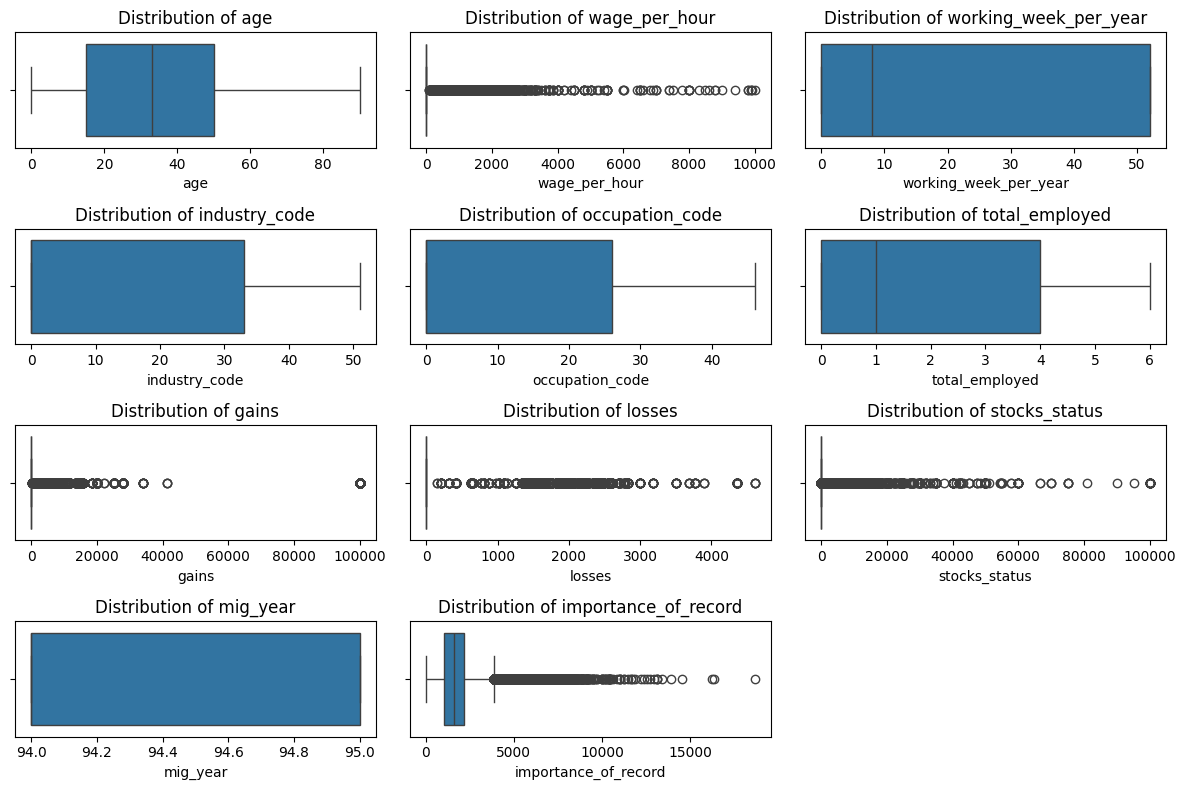

In [12]:
# df to check for outliers
df_outliers = df.drop(['employment_stat', 'vet_benefit'], axis=1)

# Number of numerical columns
num_cols = len(df_outliers.select_dtypes(include='number').columns)

# Create a grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through numerical columns and plot box plots
for index, col in enumerate(df_outliers.select_dtypes(include='number').columns):
    sns.boxplot(data=df_outliers, x=col, ax=axes[index])
    axes[index].set_title(f'Distribution of {col}')

# Hide any unused subplots
for subplot in range(index + 1, len(axes)):
    axes[subplot].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Notes:
- Most numerical columns have outliers
- This will call for scaling before modelling

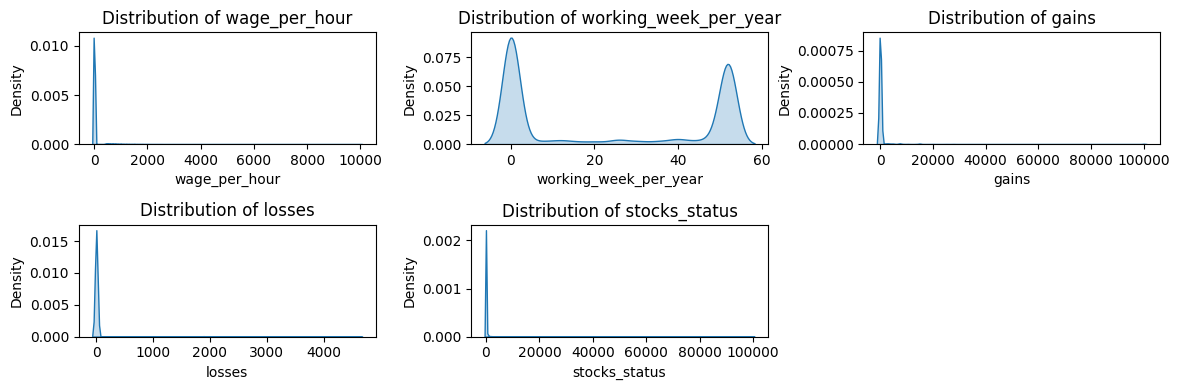

In [13]:
df_nums = df.drop(['industry_code', 'occupation_code', 'importance_of_record', 'mig_year',
                    'vet_benefit', 'total_employed', 'employment_stat', 'age'], axis=1)

# Number of numerical columns
num_cols = len(df_nums.select_dtypes(include='number').columns)

# Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 4))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through numerical columns and plot box plots
for index, col in enumerate(df_nums.select_dtypes(include='number').columns):
    sns.kdeplot(data=df_nums, x=col, ax=axes[index], fill=True)
    axes[index].set_title(f'Distribution of {col}')

# Hide any unused subplots
for subplot in range(index + 1, len(axes)):
    axes[subplot].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

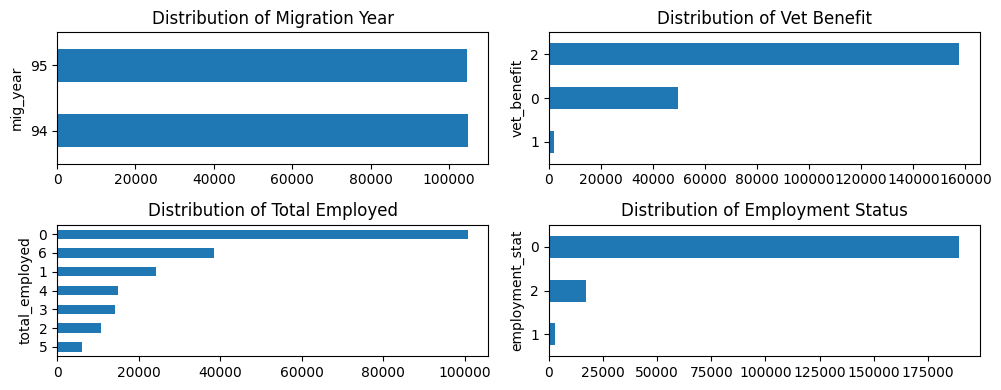

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10, 4))

# Plot barplot to show distribution of mig year                 
mig_year = df.groupby('mig_year')['mig_year'].count()
mig_year.plot.barh(ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Migration Year')

# Plot barplot to show distribution of vet benefit                
vet_benefit = df.groupby('vet_benefit')['vet_benefit'].count().sort_values()
vet_benefit.plot.barh(ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Vet Benefit')

# Plot barplot to show distribution of total employed                
total_employed = df.groupby('total_employed')['total_employed'].count().sort_values()
total_employed.plot.barh(ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Total Employed')

# Plot barplot to show distribution of employment status                
employment_stat = df.groupby('employment_stat')['employment_stat'].count().sort_values()
employment_stat.plot.barh(ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Employment Status')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

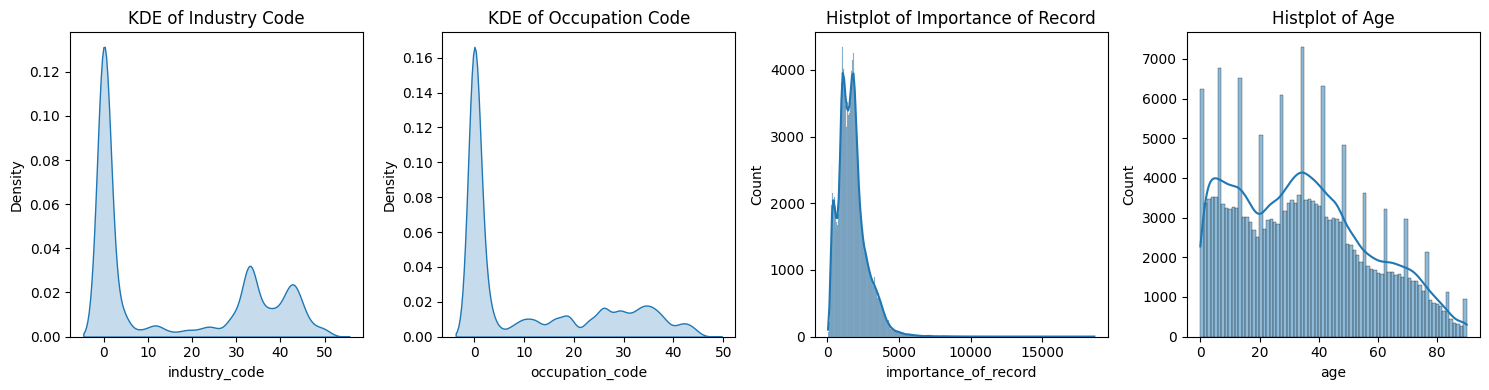

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))

# Plot KDE for industry_code on the first subplot
sns.kdeplot(data=df, x='industry_code', ax=ax[0], fill=True)

# Plot KDE for occupation_code on the second subplot
sns.kdeplot(data=df, x='occupation_code', ax=ax[1], fill=True)

#Plots KDE for industry_code on the second subplot
sns.histplot(data=df, x='importance_of_record', kde=True, ax=ax[2])

#Plots KDE for industry_code on the second subplot
sns.histplot(data=df, x='age', kde=True, ax=ax[3])

# Set titles or labels if needed
ax[0].set_title('KDE of Industry Code')
ax[1].set_title('KDE of Occupation Code')
ax[2].set_title('Histplot of Importance of Record')
ax[3].set_title('Histplot of Age')



plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Notes:
- Most of the data is positively skewed

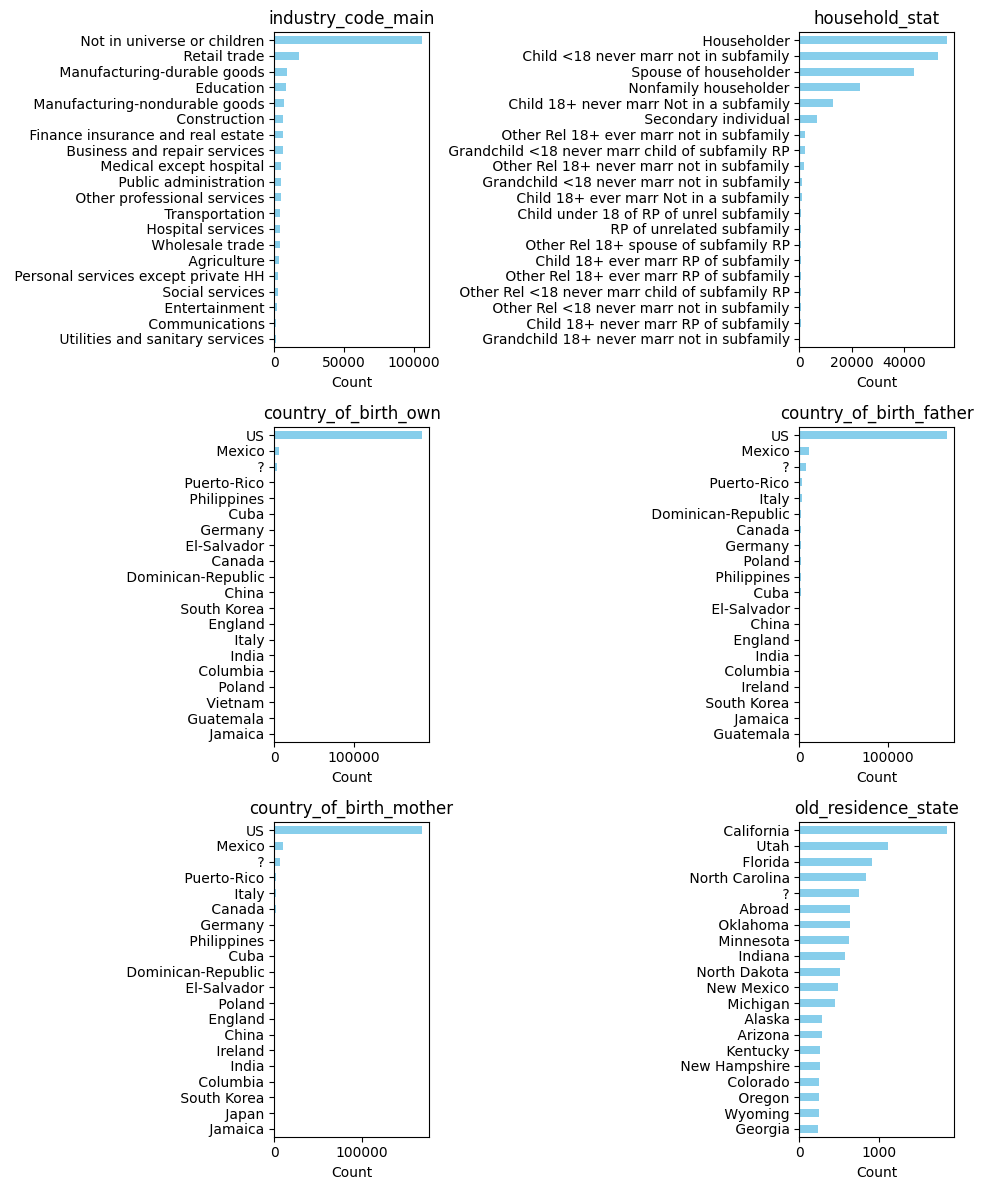

In [16]:
# Filter columns with more than 20 unique values, excluding 'ID'
columns_to_plot = [column for column in df.select_dtypes(include='object').columns if df[column].nunique() > 20 and column != 'ID']

# Create subplots
number_of_columns = len(columns_to_plot)
figure, axes = plt.subplots((number_of_columns + 1) // 2, 2, figsize=(10, (number_of_columns + 1) // 2 * 4))

# Plot each column
for axis, column in zip(axes.flatten(), columns_to_plot):
    df[column].value_counts().head(20).sort_values().plot.barh(ax=axis, color='skyblue')
    axis.set_title(column)
    axis.set_xlabel('Count')
    axis.set_ylabel('')

# Hide unused subplots
for axis in axes.flatten()[len(columns_to_plot):]:
    axis.axis('off')

plt.tight_layout()
plt.show()


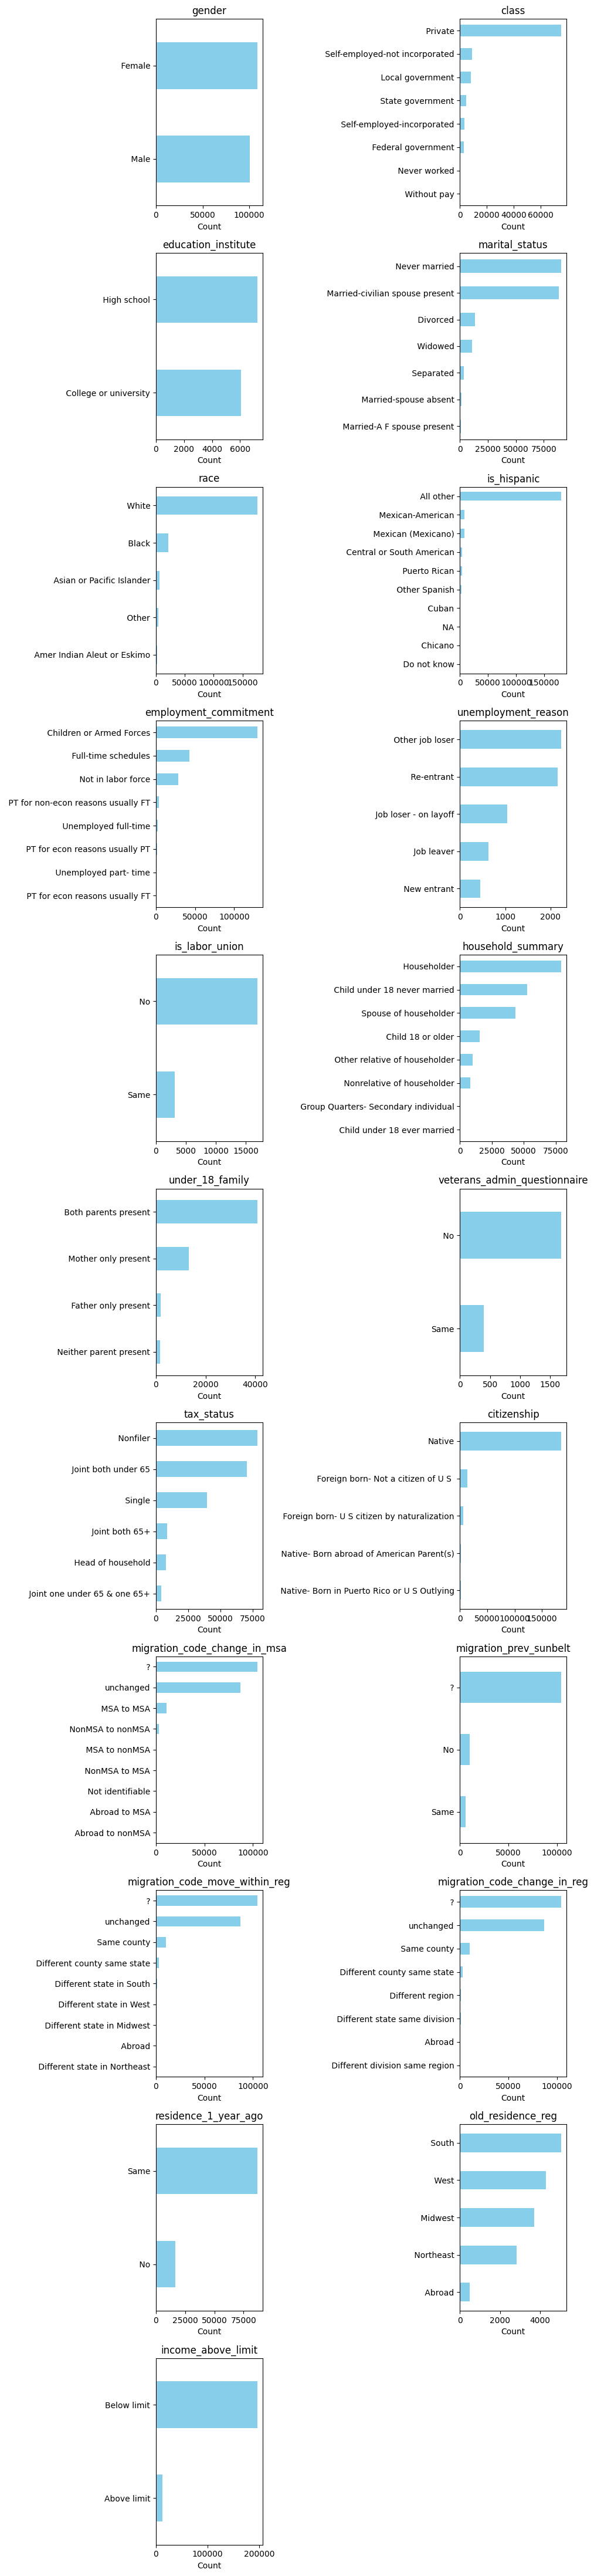

In [17]:
# Filter columns with 10 or fewer unique values, excluding 'ID'
columns_to_plot = [column for column in df.select_dtypes(include='object').columns if df[column].nunique() <= 10 and column != 'ID']

# Create subplots
number_of_columns = len(columns_to_plot)
figure, axes = plt.subplots((number_of_columns + 1) // 2, 2, figsize=(10, (number_of_columns + 1) // 2 * 4))

# Plot each column
for axis, column in zip(axes.flatten(), columns_to_plot):
    df[column].value_counts().sort_values().plot.barh(ax=axis, color='skyblue')
    axis.set_title(column)
    axis.set_xlabel('Count')
    axis.set_ylabel('')

# Hide unused subplots
for axis in axes.flatten()[len(columns_to_plot):]:
    axis.axis('off')

plt.tight_layout()
plt.show()


In [18]:
# Drop the 'ID' column and select only categorical columns
cat_cols = df.drop(columns='ID').select_dtypes(exclude=['number', 'float']).columns

# Iterate over each categorical column and print unique values
for column in cat_cols:
    print(f'Unique values in {column}: {df[column].unique()}')
    print('-' * 120)  # Adjust the length as needed


Unique values in gender: [' Female' ' Male']
------------------------------------------------------------------------------------------------------------------------
Unique values in education: [' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']
------------------------------------------------------------------------------------------------------------------------
Unique values in class: [nan ' Federal government' ' Private' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Without pay' ' Never worked']
--------------------------------

Notes:
- There are some leading spaces in most of the categorical columns
- We are going to strip the off
- There value 'NA' in 'is_hispanic' - We will replace it with 'All other'
- We will replace value '?' with nan 

### **Bivariate Analysis**

### **1. Does race influence the income limits a person can achieve?**


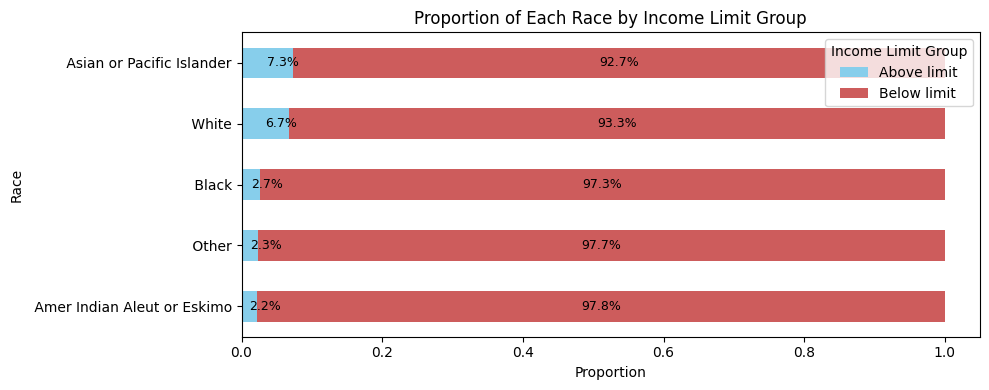

In [19]:
# Calculate proportions for each category in citizenship
df_prop_race = df.groupby('race')['income_above_limit'].value_counts(normalize=True).unstack()

# Sort by 'Above limit'
df_prop_sorted = df_prop_race.sort_values(by='Above limit', ascending=True)

# Plot
ax = df_prop_sorted.plot(kind='barh', stacked=True, color=['skyblue', 'indianred'], figsize=(10, 4))

# Add data labels
for i, (below, above) in enumerate(df_prop_sorted.values):
    ax.text(below / 2, i, f'{below:.1%}', ha='left', va='center', color='black', fontsize=9)
    ax.text(below + above / 2, i, f'{above:.1%}', ha='center', va='center', color='black', fontsize=9)

# Labels and title
ax.set_xlabel('Proportion')
ax.set_ylabel('Race')
ax.set_title('Proportion of Each Race by Income Limit Group')
ax.legend(['Above limit', 'Below limit'], title='Income Limit Group')
plt.tight_layout()
plt.show()


### **Notes**
- Race and Income Limit:   
Race does not have a significant impact on the income limit a person earns.  
Proportions of 'Above Limit':  
Asian or Pacific Islanders: Highest proportion at 0.073  
Whites: Second highest proportion at 0.0674  
Blacks: Proportion of 0.0268  
Others: Proportion of 0.0234  
American Indian Aleut Eskimos: Lowest proportion at 0.0215

### **2. Does Age Affect the Income Limits Achievable by an Individual?**


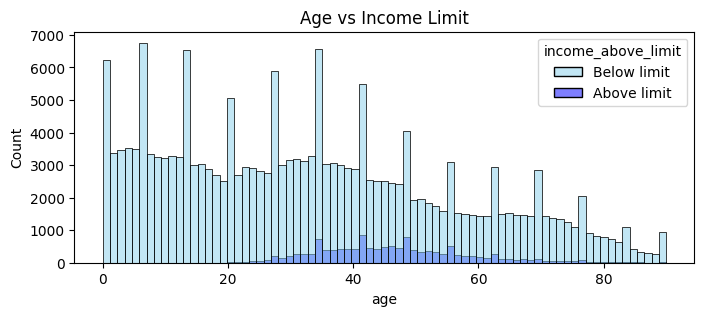

In [20]:
# Comparison of totals cases per PR reading against number of postive cases
# Create the histoplot
plt.figure(figsize=(8,3))
sns.histplot(hue='income_above_limit', x='age', data=df, fill=True, palette=['skyblue', 'blue'])
plt.title('Age vs Income Limit')
plt.show()


### **Notes**:
- The impact of age on income limits is not strongly pronounced.
- While most individuals earn below the limit, those between approximately 25 and 65 years old are more likely to earn above the limit.

### **3. How Does Gender Impact Income Levels??**

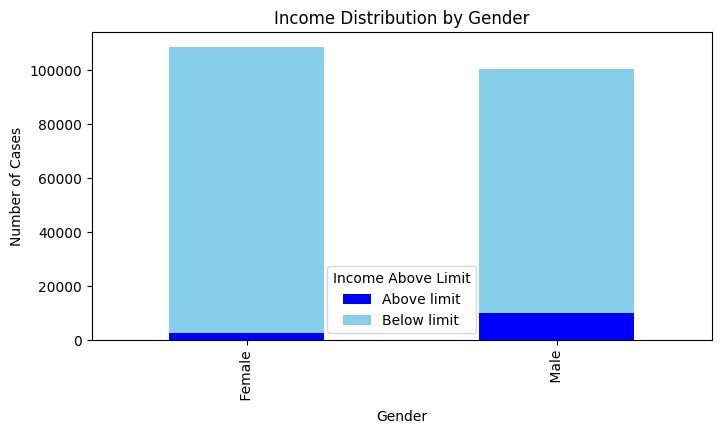

In [21]:
# Calculate the counts of each category
income_gender_counts = df.groupby(['gender', 'income_above_limit']).size().unstack()

# Plot stacked bar plot
income_gender_counts.plot(kind='bar', stacked=True, color=['blue', 'skyblue'], figsize=(8, 4))

# Add title and labels
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.legend(title='Income Above Limit')

# Show the plot
plt.show()

### **Notes**:
- Gender does not significantly impact income levels.
- Interestingly, even though there are fewer males, they are more more males earning above the income limit compared to their female counterparts.

### **4. Is There a Relationship Between Citizenship and Income Limits?**

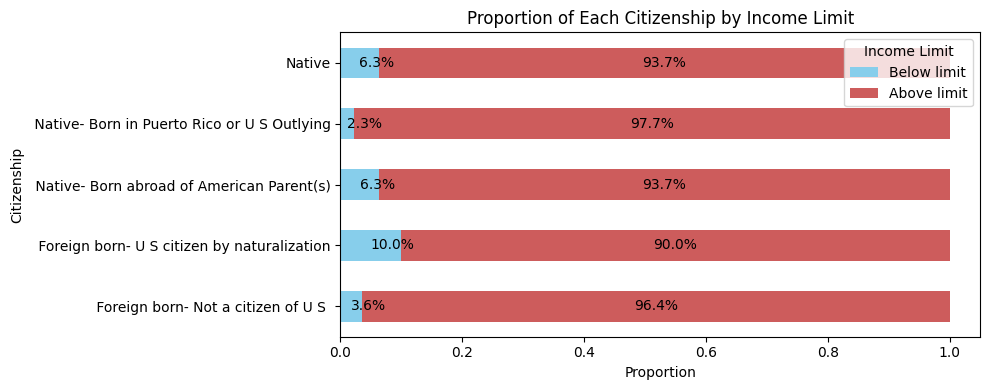

In [22]:
# Calculate proportions for each category in citizenship
df_prop = df.groupby('citizenship')['income_above_limit'].value_counts(normalize=True).unstack()

# Plot stacked bar chart 
ax = df_prop.plot(kind='barh', stacked=True, color=['skyblue', 'indianred'], figsize=(10, 4))

# Add data labels for 'Below limit' and 'Above limit'
for i, (below, above) in enumerate(df_prop.values):
    # Position for 'Below limit'
    ax.text(below / 2, i, f'{below:.1%}', ha='left', va='center', color='black', fontsize=10)
    # Position for 'Above limit'
    ax.text(below + above / 2, i, f'{above:.1%}', ha='center', va='center', color='black', fontsize=10)

# Add labels and title
ax.set_xlabel('Proportion')
ax.set_ylabel('Citizenship')
ax.set_title('Proportion of Each Citizenship by Income Limit')
ax.legend(['Below limit', 'Above limit'], title='Income Limit')
plt.tight_layout()
plt.show()

### **Notes**:

- Citizenship does not significantly impact income levels.
- Highest proportion of the people earn on the 'Below limit'
- US citizens by naturalarization have a higher 'Above limit' (10%) income compared to all other types of citizenship
- Natives born in Puerto Rico and other Outlying countries  have the lowest 'Above limit' (2.3%) income compared to all other types of citizenship



### **5. How Are Income Limits Distributed Across Different Tax Status Categories?**

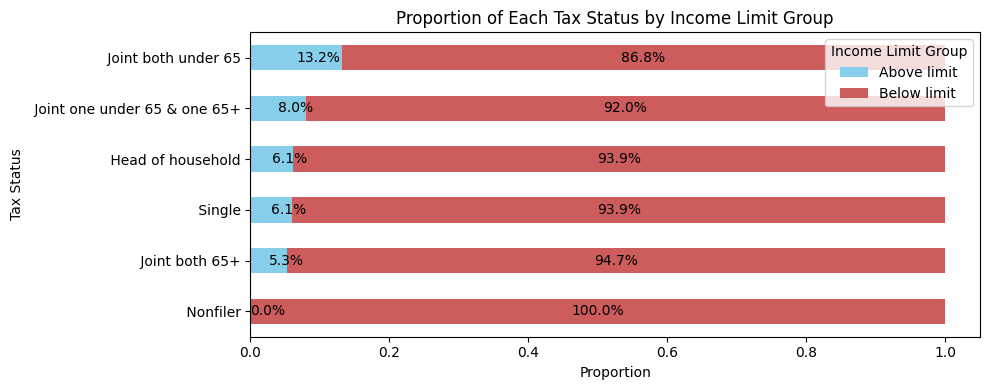

In [23]:
# Calculate proportions for each category in tax_status
df_prop = df.groupby('tax_status')['income_above_limit'].value_counts(normalize=True).unstack()

# Sort by 'Above limit'
df_prop_sorted = df_prop.sort_values(by='Above limit', ascending=True)

# Plot
ax = df_prop_sorted.plot(kind='barh', stacked=True, color=['skyblue', 'indianred'], figsize=(10, 4))

# Add data labels
for i, (below, above) in enumerate(df_prop_sorted.values):
    ax.text(below / 2, i, f'{below:.1%}', ha='left', va='center', color='black', fontsize=10)
    ax.text(below + above / 2, i, f'{above:.1%}', ha='center', va='center', color='black', fontsize=10)

# Labels and title
ax.set_xlabel('Proportion')
ax.set_ylabel('Tax Status')
ax.set_title('Proportion of Each Tax Status by Income Limit Group')
ax.legend(['Above limit', 'Below limit', ], title='Income Limit Group')
plt.tight_layout()
plt.show()


## **Notes:**
- Almost all non filers fall in the below limit category
- Joint both under 65 are the have the highest proportion of above limit category

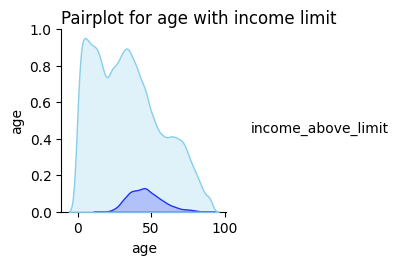

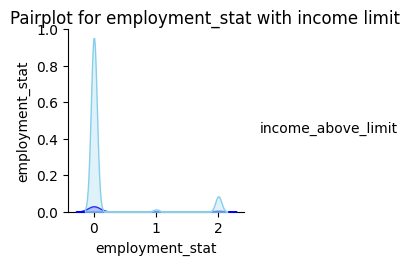

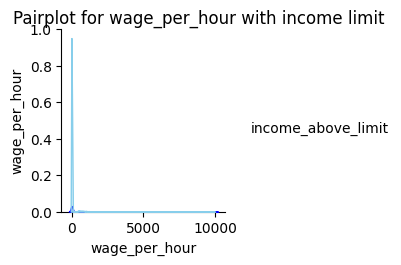

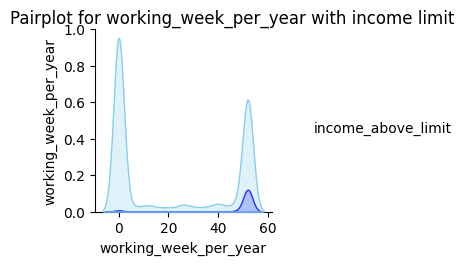

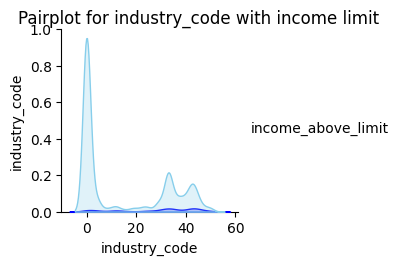

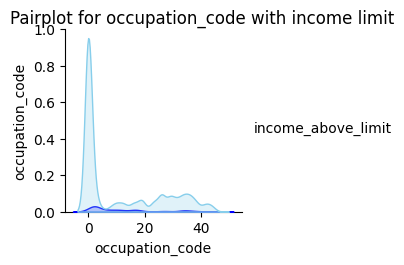

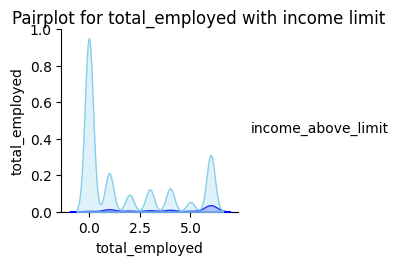

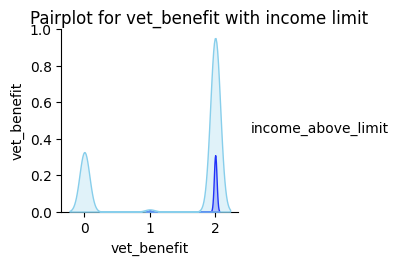

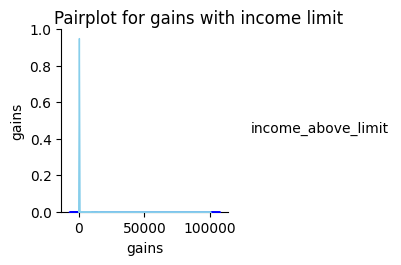

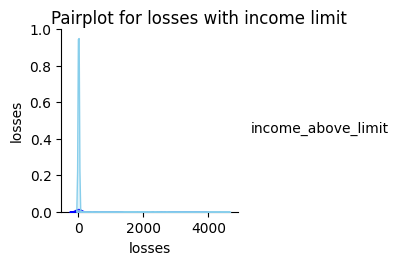

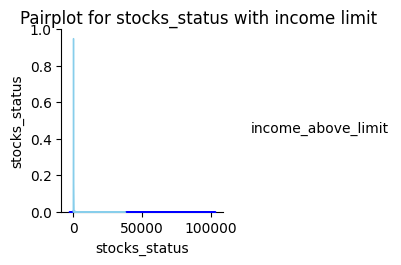

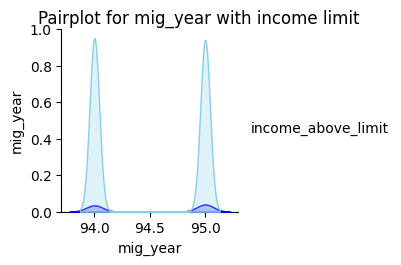

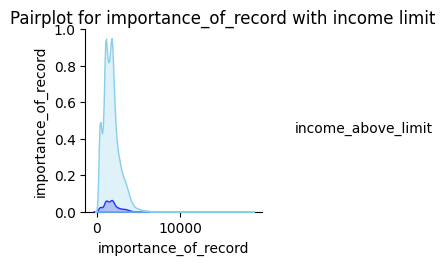

In [24]:
# Select the numeric columns
numeric_columns = df.select_dtypes(include='number').columns

# Loop through each numeric column to create a pairplot
for col in numeric_columns:
    # Create a pairplot for the current numeric column along with 'income_above_limit'
    pairplot = sns.pairplot(df, hue='income_above_limit', vars=[col], palette=['skyblue', 'blue'])
    pairplot.fig.suptitle(f'Pairplot for {col} with income limit', y=1.02)  # Adjust the title position
    plt.show()

Notes:
- Overall, it is safe to conclude that most people earn on the "Below limit" category. Only a small proportion of people earn on the "Above limit" category
- However, from the analysis we can cite that:
1. People who work more weeks per year have a higher proportion of people earning on the "Above limit" category than those who work less weeks per year
2. Those with vet benefit catgory '2' have a higher proportion of individuals earrning on the "Above limit" category than those in category '0' and '1'
3. Midlle aged people have a higher proportion of people earrning on the "Above limit" category the too young and the too old

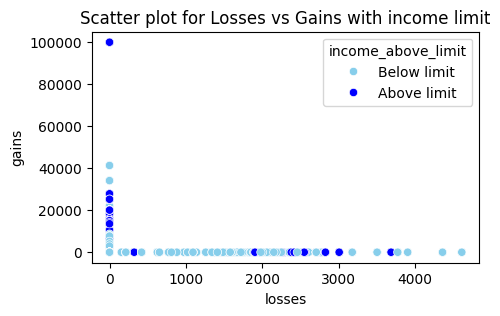

In [25]:
# Scatteplot to show how gains and losses are distribured with income limit
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='losses', y='gains', hue='income_above_limit', palette=['skyblue', 'blue'])
plt.title('Scatter plot for Losses vs Gains with income limit')
plt.show()

Notes:
- Mostly losses are incurred, however people people earning below limit tend to make the most losses and people earning above limit tend to make the most gains

<Figure size 1500x1500 with 0 Axes>

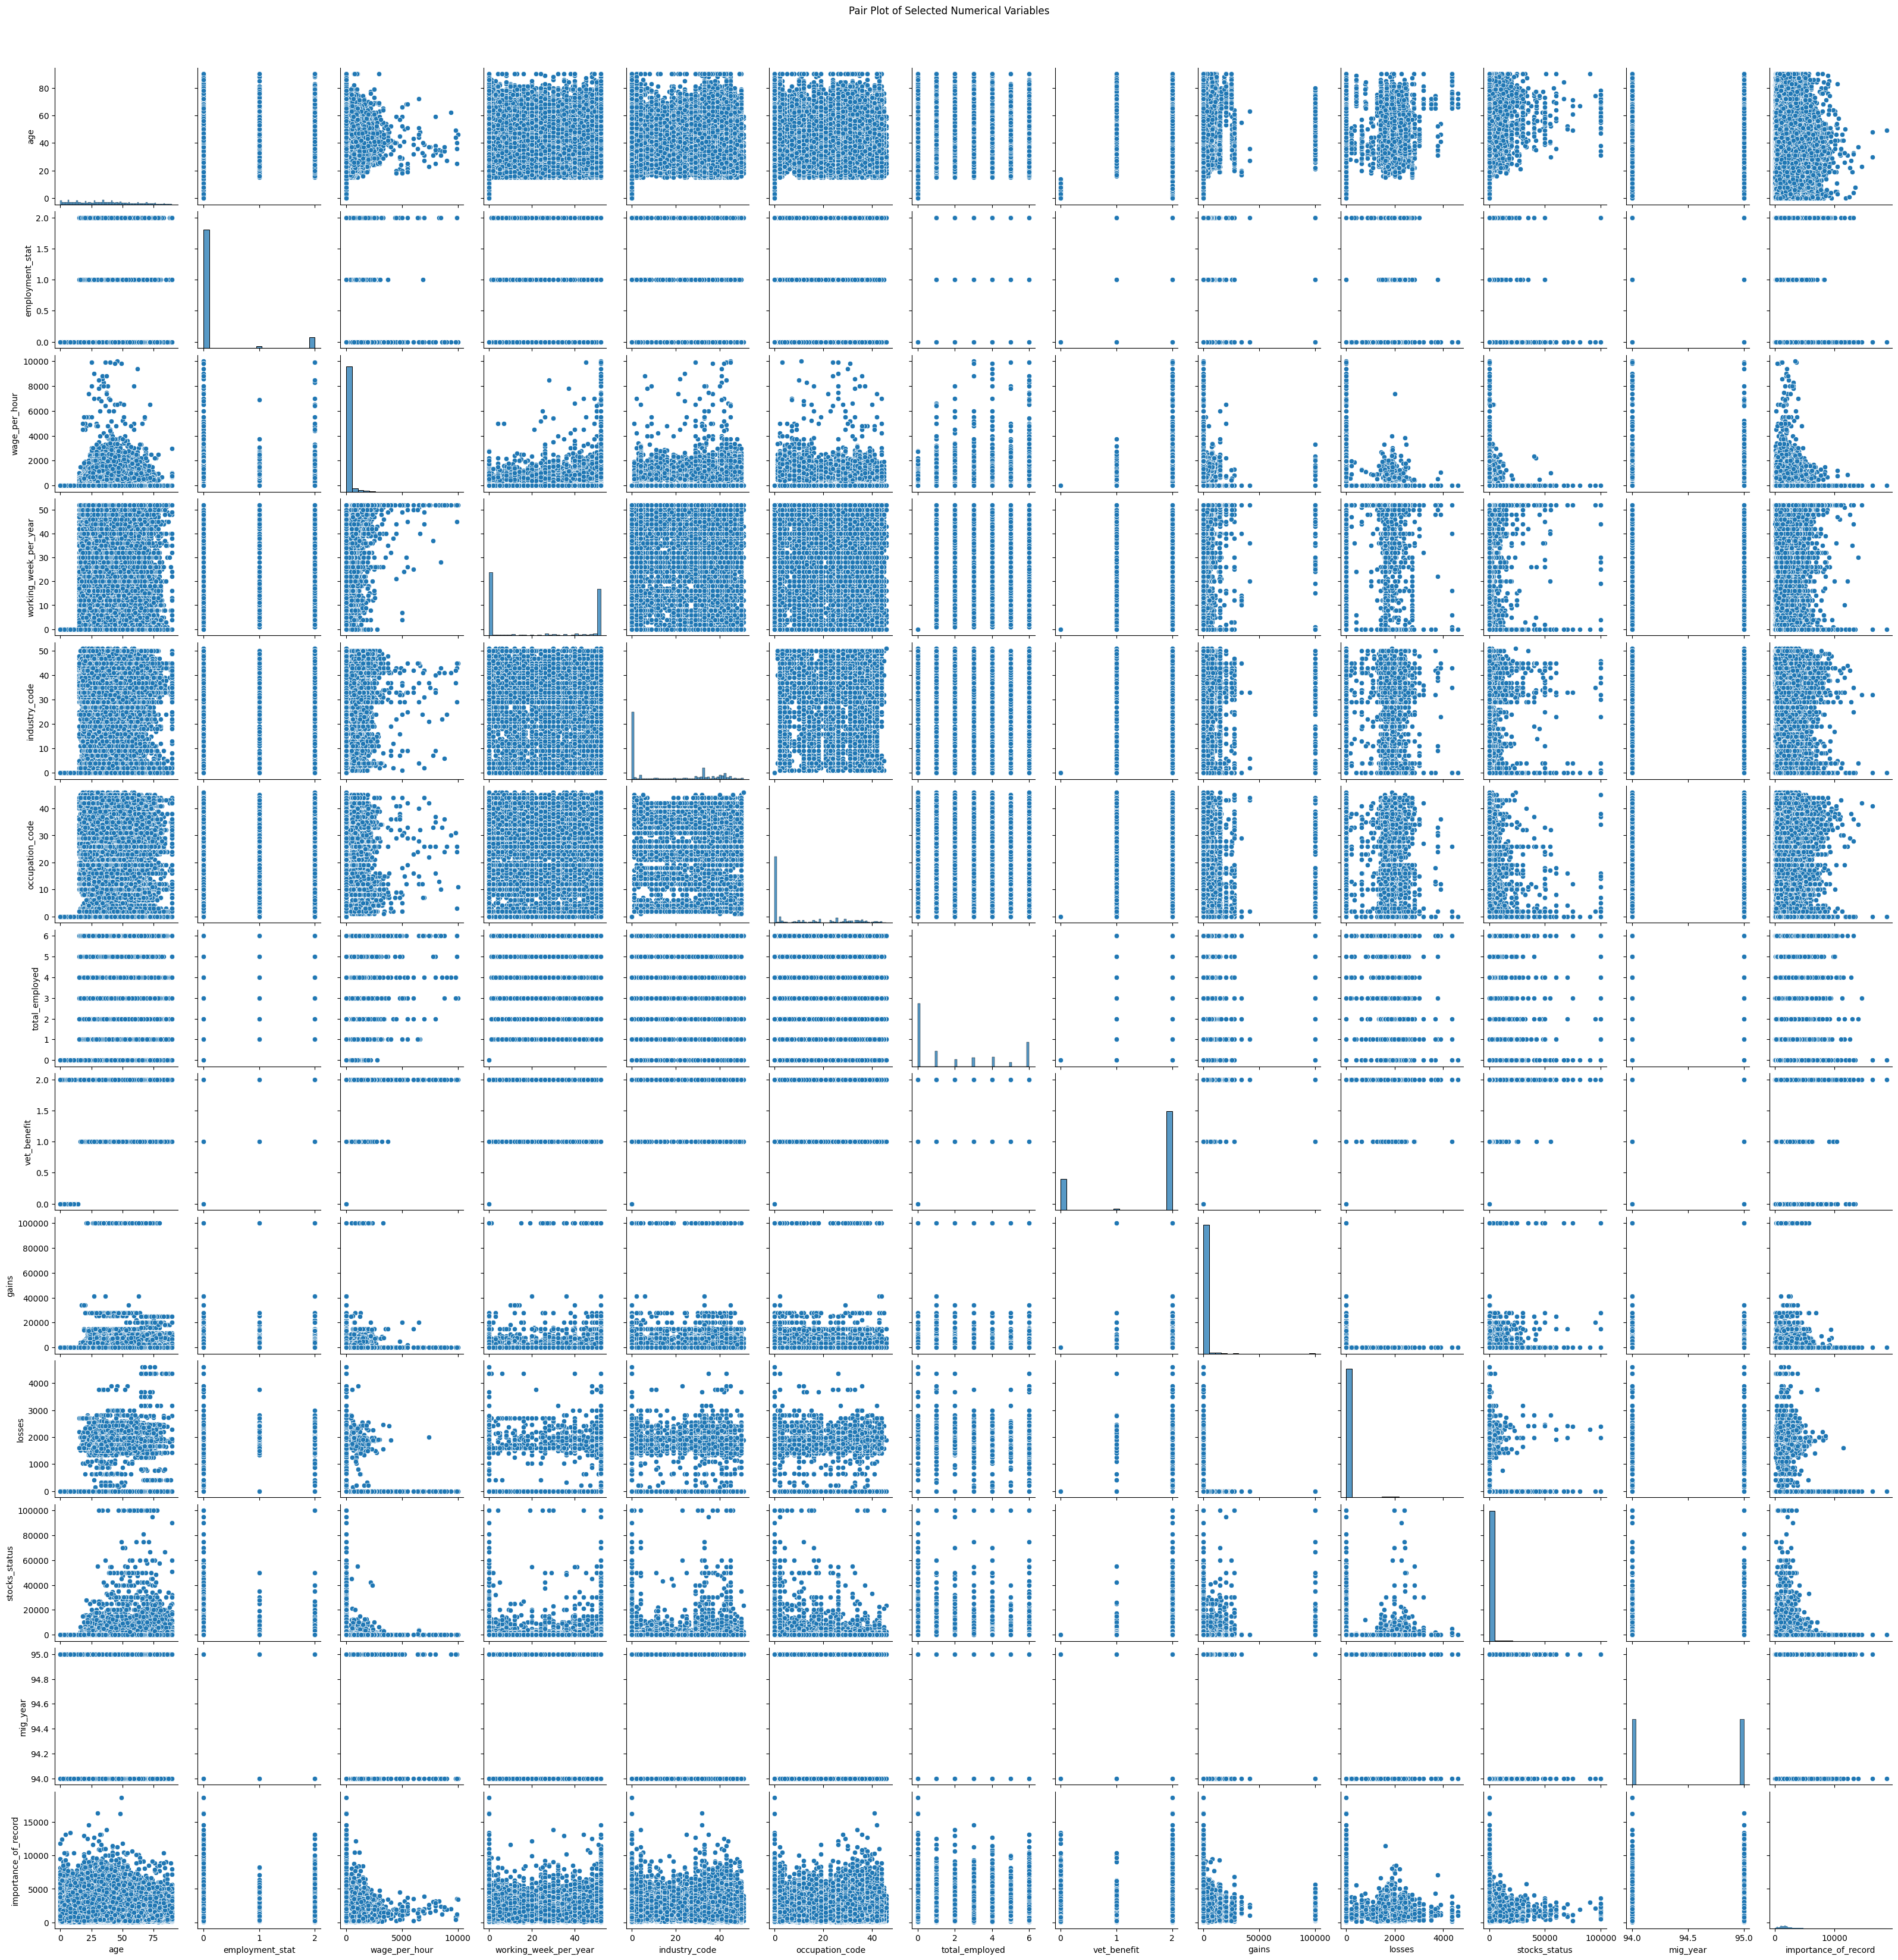

In [26]:
# Select only numerical columns
numerical_features = df.select_dtypes(include=['number', 'float']).columns

# Create pair plot for selected numerical features
plt.figure(figsize=(15, 15))
sns.pairplot(df[numerical_features])
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)
plt.show()


<Figure size 1500x1500 with 0 Axes>

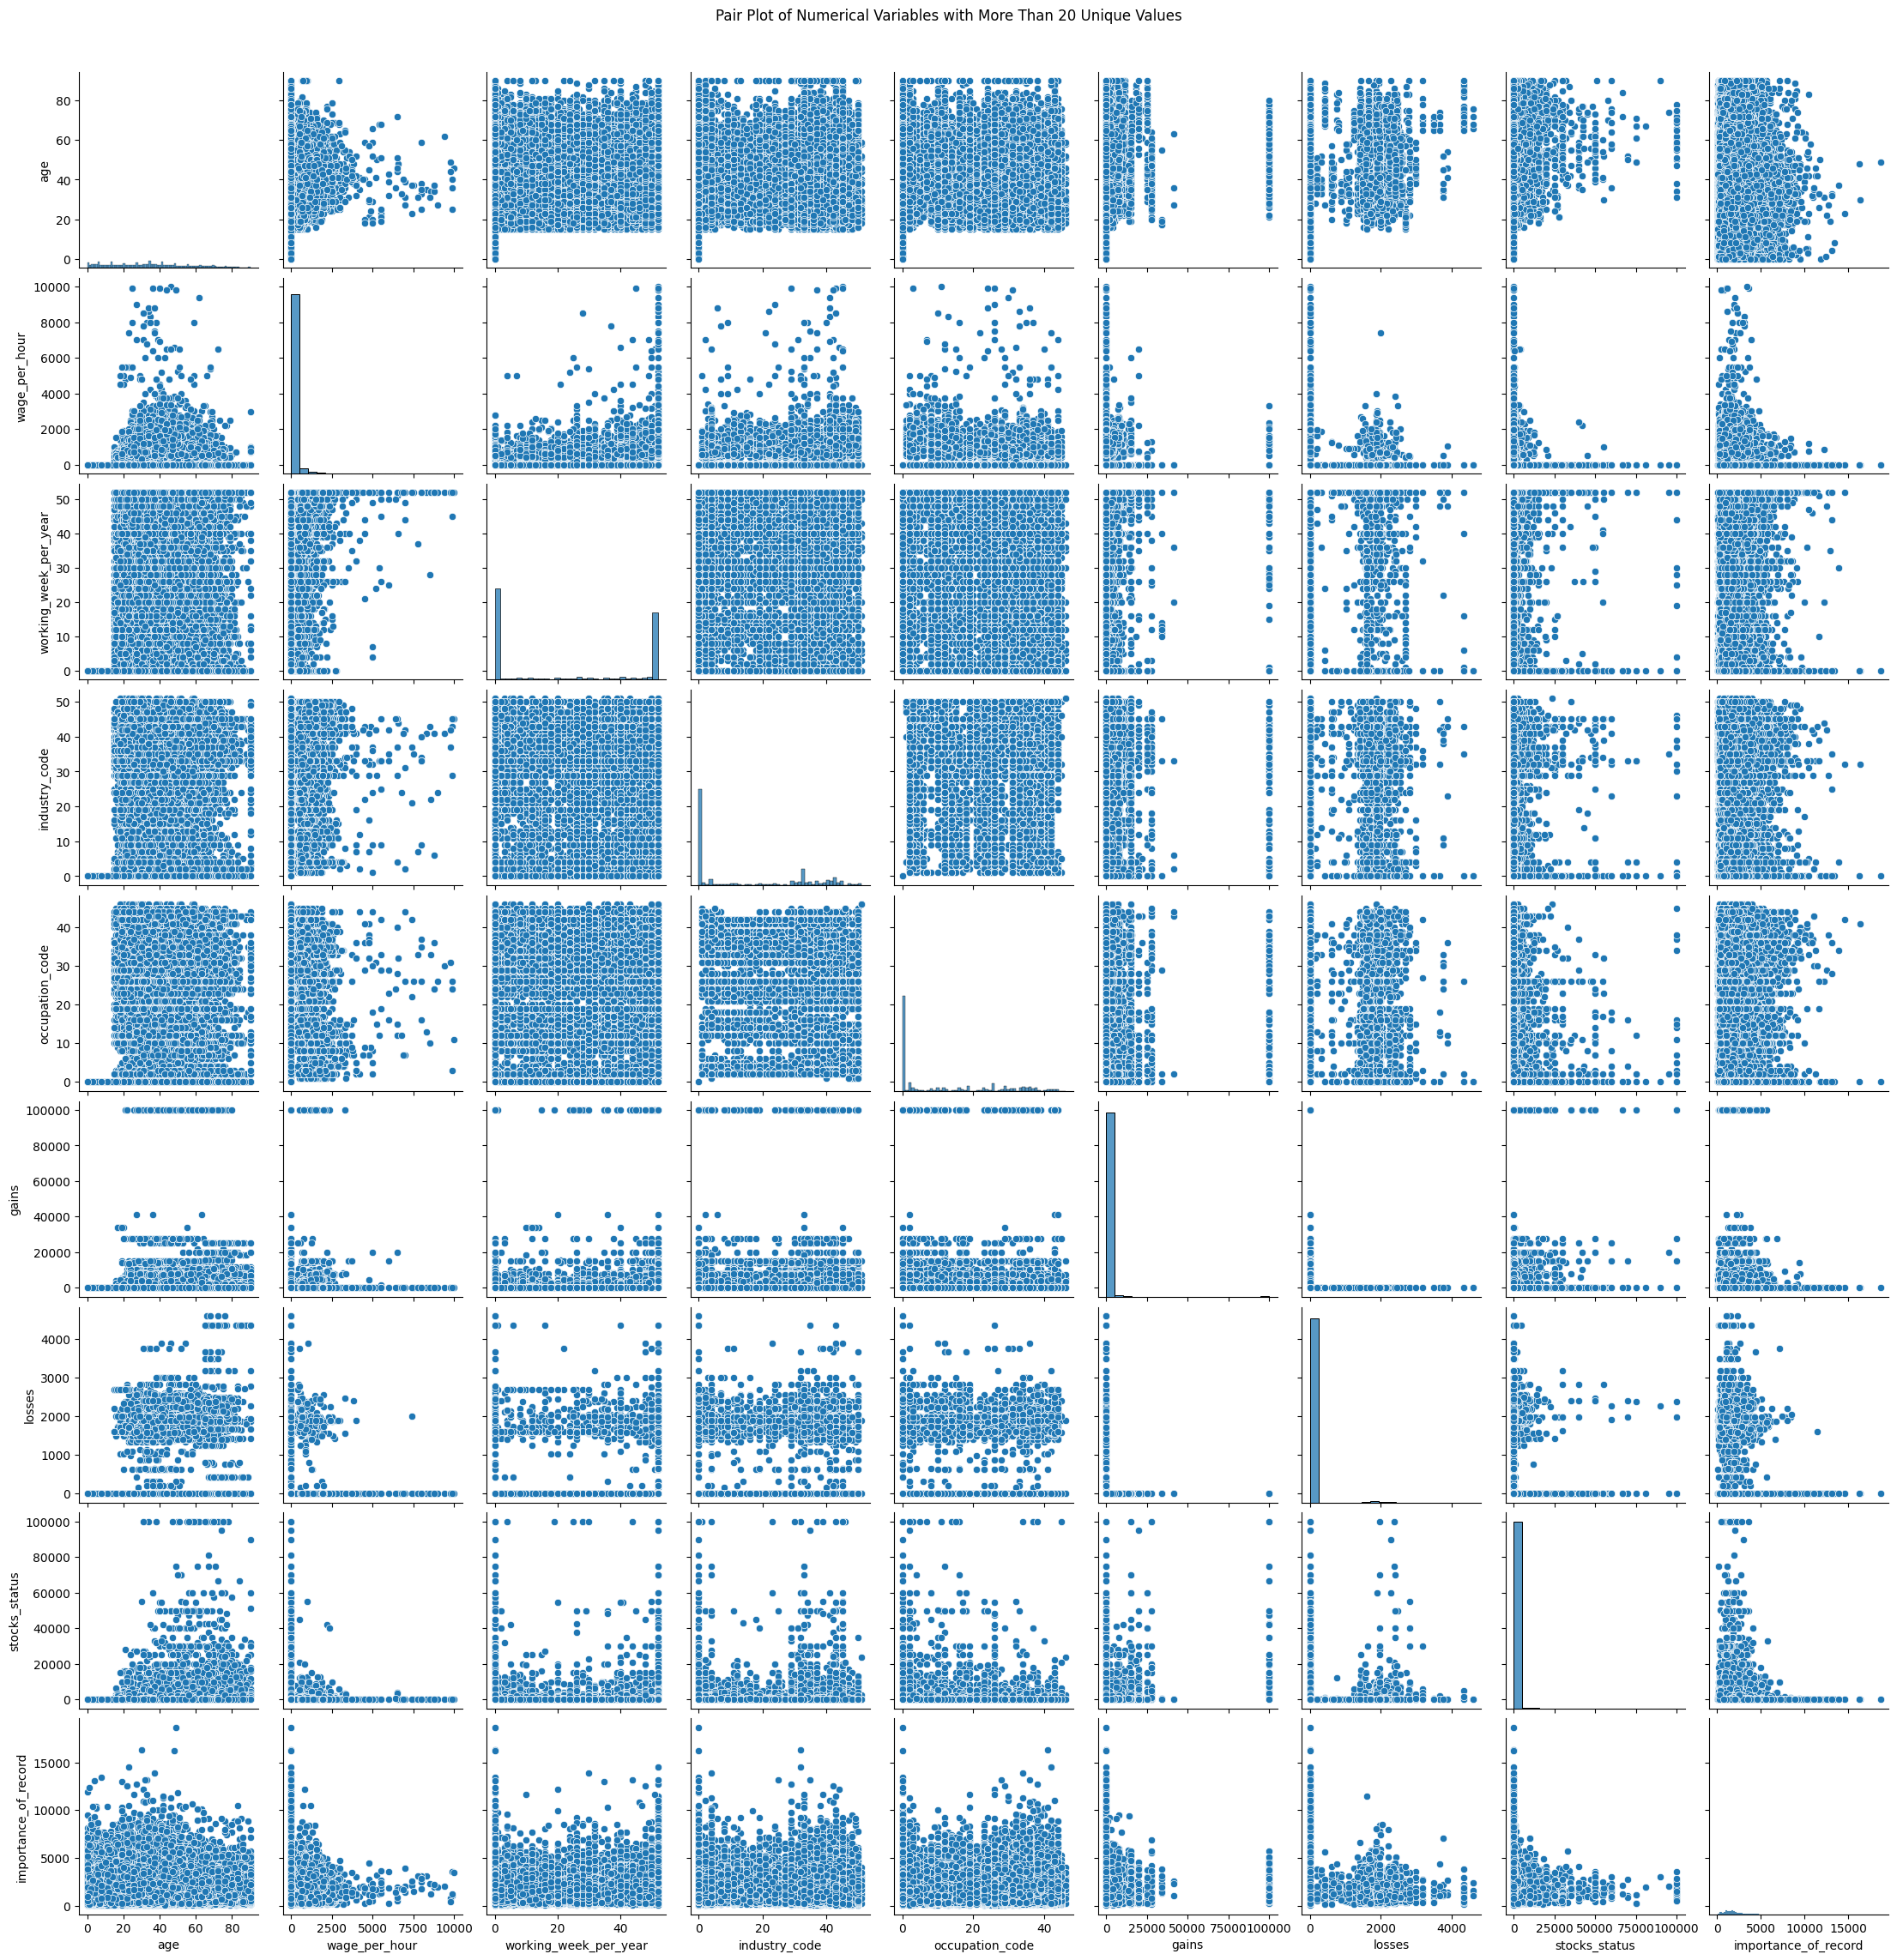

In [27]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number', 'float'])

# Filter numerical columns with more than 20 unique values
cols_with_many_unique = [col for col in numerical_cols if df[col].nunique() > 20]

# Create pair plot for these selected numerical features
plt.figure(figsize=(15, 15))
sns.pairplot(df[cols_with_many_unique])
plt.suptitle('Pair Plot of Numerical Variables with More Than 20 Unique Values', y=1.02)
plt.show()


### **Multivariate Analysis**

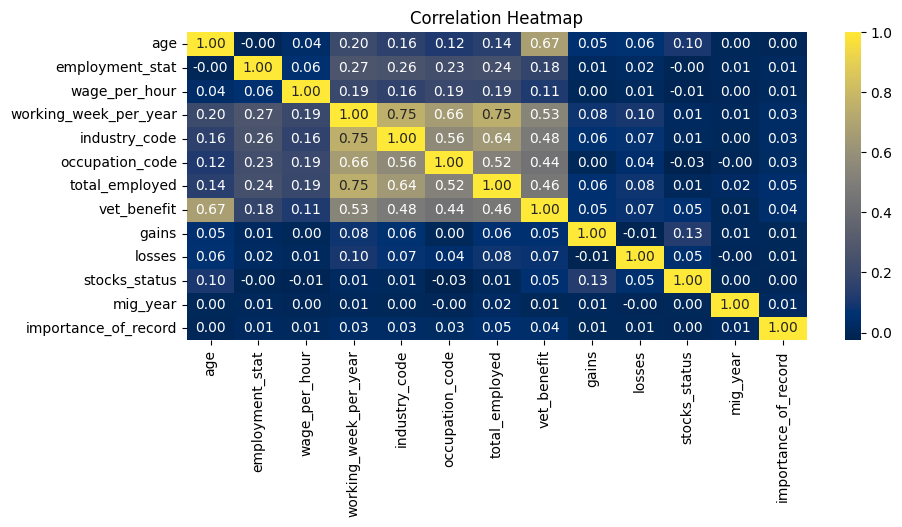

In [28]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='cividis', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Correlation Summary

The correlation matrix of various variables reveals the following key insights:

- **Overall Correlation**: Most variables exhibit low or insignificant correlations with each other.

### Notable Correlations

1. **Total Employed and Working Weeks Per Year**  
   Correlation: `0.75`  
   A strong positive correlation indicating that as the total number of employed individuals increases, the number of working weeks per year also tends to increase.

2. **Vet Benefit and Working Weeks Per Year**  
   Correlation: `0.53`  
   A moderate positive correlation suggesting that individuals receiving vet benefits often have a higher number of working weeks per year.

3. **Age and Vet Benefit**  
   Correlation: `0.67`  
   A strong positive correlation indicating that older individuals are more likely to receive vet benefits.

4. **Total Employed and Industry Code**  
   Correlation: `0.64`  
   A substantial positive correlation showing that industries with more total employment are closely associated with specific industry codes.

5. **Occupation Code and Working Weeks Per Year**  
   Correlation: `0.66`  
   A strong positive correlation implying that certain occupation codes are linked with a higher number of working weeks per year.

6. **Total Employed and Occupation Code**  
   Correlation: `0.52`  
   A moderate positive correlation suggesting that the number of total employed individuals is related to specific occupation codes.

7. **Wage Per Hour and Working Weeks Per Year**  
   Correlation: `0.19`  
   A modest positive correlation indicating a slight relationship between higher hourly wages and more working weeks per year.

8. **Vet Benefit and Age**  
   Correlation: `0.67`  
   A strong positive correlation highlighting the tendency for older individuals to receive vet benefits.

### **Hypothesis Testing**

In [29]:
# Define the alpha level
alpha = 0.05

# Create a contingency table
contingency_table = pd.crosstab(df['income_above_limit'], df['education'])

# Perform Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between 'income_above_limit' and 'education'.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between 'income_above_limit' and 'education'.")


Chi-Square Statistic: 32023.581349682216
P-Value: 0.0
Reject the null hypothesis: There is a significant association between 'income_above_limit' and 'education'.


### **Notes**

#### Chi-Square Test Results

The Chi-Square test was performed to assess the association between `income_above_limit` and `education`. The results are as follows:

- **Chi-Square Statistic**: `32023.58`  
  The Chi-Square statistic measures the deviation of the observed frequencies from the expected frequencies under the null hypothesis. A high Chi-Square value indicates a strong deviation, suggesting a significant association between the variables.

- **P-Value**: `0.0`  
  The p-value represents the probability of observing a Chi-Square statistic as extreme as, or more extreme than, the value obtained if the null hypothesis were true. A p-value of `0.0` (or very close to zero) indicates a highly significant result.

#### Interpretation

Given the p-value is less than the standard alpha level of `0.05`, we **reject the null hypothesis**. This means there is a statistically significant association between `income_above_limit` and `education`. In other words, the distribution of income levels is not independent of education levels; rather, different educational backgrounds are associated with different income levels.

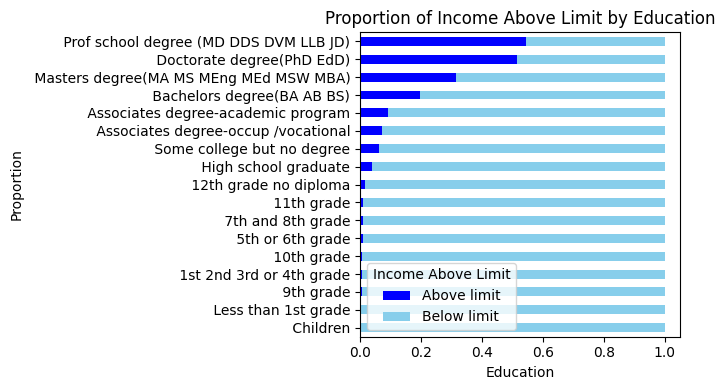

In [30]:
# Create a normalized contingency table
contingency_table = pd.crosstab(df['education'], df['income_above_limit'], normalize='index')

# Sort by the 'Above limit' proportion
contingency_table = contingency_table.sort_values(by='Above limit', ascending=True)  

# Plot a stacked bar chart
contingency_table.plot(kind='barh', stacked=True, color=['blue', 'skyblue'], figsize=(7, 4))
plt.title('Proportion of Income Above Limit by Education')
plt.xlabel('Education')
plt.ylabel('Proportion')
plt.legend(title='Income Above Limit')
plt.tight_layout()
plt.show()


### **Observations**
- **Higher Education:** As educational attainment increases, the proportion of individuals with income above the limit rises significantly. For instance, individuals with a Doctorate or Professional School Degree have notably higher proportions of income above the limit compared to those with less education.
- **Lower Education:** Conversely, individuals with lower levels of education, such as "Children" or "Less than 1st grade," have very low proportions of income above the limit, indicating a strong association between education level and income.
This data reinforces the notion that higher education levels are generally associated with higher income, supporting the observed significant association between income_above_limit and education.



## **`3. Data Preparation`**

Notes:

During our exploratory data analysis (EDA), we observed that certain columns in the dataset have missing values exceeding 50%. This significant proportion of missing data poses a challenge:

- **Impact on Data Integrity**: Imputing such a large amount of missing data could lead to inaccuracies and potentially corrupt our analysis and results. The imputation process may introduce biases or distortions, especially if the missing data is not randomly distributed.  

To maintain the integrity and reliability of our analysis, we have decided to drop these columns. Removing them ensures that the dataset remains robust and that subsequent analyses are based on complete and accurate data.  

This approach helps to focus on the most reliable variables, ensuring the validity of our findings and the overall quality of our data-driven insights.

In [31]:
# Select only categorical columns
cat_cols = df.select_dtypes(exclude=['number', 'float']).columns

# Strip leading and trailing spaces in all categorical columns
df[cat_cols] = df[cat_cols].applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [32]:
# Columns missing more than 50% of values
missing_50 = missing_values[missing_values>50]
missing_50 = missing_50.reset_index(name='Percentage')
missing_50

index  Percentage
0                         class       50.24
1           education_institute       93.65
2           unemployment_reason       96.89
3                is_labor_union       90.42
4          occupation_code_main       50.45
5               under_18_family       72.39
6  veterans_admin_questionnaire       99.01
7          residence_1_year_ago       50.73
8             old_residence_reg       92.20
9           old_residence_state       92.20

In [33]:
# Drop all unnecessary and columns with alot of missing values
train_df = df.drop(missing_50['index'], axis=1)
train_df = train_df.drop('ID', axis=1)
train_df.columns

Index(['age', 'gender', 'education', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'industry_code', 'industry_code_main',
       'occupation_code', 'total_employed', 'household_stat',
       'household_summary', 'vet_benefit', 'tax_status', 'gains', 'losses',
       'stocks_status', 'citizenship', 'mig_year', 'country_of_birth_own',
       'country_of_birth_father', 'country_of_birth_mother',
       'migration_code_change_in_msa', 'migration_prev_sunbelt',
       'migration_code_move_within_reg', 'migration_code_change_in_reg',
       'importance_of_record', 'income_above_limit'],
      dtype='object')

In [34]:
# Strip off '?' and replace with 'nan'
columns_to_strip = [
    'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother',
    'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg',
    'migration_code_change_in_reg'
]

for column in columns_to_strip:
    train_df[column] = train_df[column].replace('?', np.nan)


In [35]:
# columns with over 50% in missing data after cleaning
post_cleaning_missing_values = round((train_df.isna().sum()/ len(train_df))*100,2)
post_cleaning_missing_values = post_cleaning_missing_values[post_cleaning_missing_values>50].reset_index(name='Percentage')
post_cleaning_missing_values

index  Percentage
0    migration_code_change_in_msa       50.73
1          migration_prev_sunbelt       92.20
2  migration_code_move_within_reg       50.73
3    migration_code_change_in_reg       50.73

In [36]:
# Drop all columns with more than 50% in missing values
train_df = train_df.drop(post_cleaning_missing_values['index'].to_list(), axis=1)
train_df.columns

Index(['age', 'gender', 'education', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'industry_code', 'industry_code_main',
       'occupation_code', 'total_employed', 'household_stat',
       'household_summary', 'vet_benefit', 'tax_status', 'gains', 'losses',
       'stocks_status', 'citizenship', 'mig_year', 'country_of_birth_own',
       'country_of_birth_father', 'country_of_birth_mother',
       'importance_of_record', 'income_above_limit'],
      dtype='object')

In [37]:
# Replace 'NA' in is_hispanic with 'all_other'
train_df['is_hispanic'] = train_df['is_hispanic'].replace('NA', 'All other')
train_df['is_hispanic'].value_counts()

is_hispanic
All other                    181286
Mexican-American               8509
Mexican (Mexicano)             7614
Central or South American      4176
Puerto Rican                   3435
Other Spanish                  2612
Cuban                          1231
Chicano                         331
Do not know                     305
Name: count, dtype: int64

### **Data Splitting**

In [38]:
# X, y split
X = train_df.drop('income_above_limit', axis=1)
y = train_df['income_above_limit']

In [39]:
X.sample(5)

age  gender                   education  \
204695   27  Female        High school graduate   
7260     41  Female  Some college but no degree   
184129   42    Male        High school graduate   
24578    21  Female       12th grade no diploma   
131931   27  Female  Bachelors degree(BA AB BS)   

                         marital_status   race is_hispanic  \
204695                    Never married  White   All other   
7260    Married-civilian spouse present  White   All other   
184129                         Divorced  White   All other   
24578                     Never married  Black   All other   
131931  Married-civilian spouse present  White   All other   

           employment_commitment  employment_stat  wage_per_hour  \
204695       Full-time schedules                2              0   
7260         Full-time schedules                0              0   
184129  Children or Armed Forces                0              0   
24578       Unemployed full-time                0              0   
131931  Children or Armed Forces                0              0   

        working_week_per_year  ...           tax_status gains  losses  \
204695                     52  ...               Single     0       0   
7260                       52  ...  Joint both under 65     0       0   
184129                     30  ...               Single     0       0   
24578                       0  ...             Nonfiler     0       0   
131931                     52  ...  Joint both under 65     0       0   

        stocks_status citizenship mig_year  country_of_birth_own  \
204695              0      Native       95                    US   
7260                0      Native       95                    US   
184129              0      Native       94                    US   
24578               0      Native       95                    US   
131931              0      Native       94                    US   

       country_of_birth_father  country_of_birth_mother  importance_of_record  
204695                      US                       US               1071.65  
7260                        US                       US               1247.19  
184129                      US                       US               1585.11  
24578                       US                       US               3273.31  
131931                      US                       US                267.47  

[5 rows x 27 columns]

In [40]:
y.sample(5)

104514    Below limit
187070    Below limit
90947     Below limit
130620    Below limit
139206    Below limit
Name: income_above_limit, dtype: object

In [41]:
# Check for target variable balance
y.value_counts()

income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64

In [42]:
# Percentage of each class
(y.value_counts() / len(y)) * 100

income_above_limit
Below limit    93.795674
Above limit     6.204326
Name: count, dtype: float64

Notes:
- The target variable is imbalanced and we will need apply smote so as to train our model with balanced dataset.
- 'Below limit' category accounts for 93% of the entire dataset proving a very severe imbalance

To resolve this issue, we will use SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class ('Above limit') and balance the dataset. This will help our model to have a more balanced representation of the target variable.

In [43]:
# Perform the train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)


In [44]:
# Get shape of train and test X data
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (146649, 27), X_test: (62850, 27), y_train: (146649,), y_test: (62850,)


In [45]:
# Define numerical columns
numerical_columns = X_train.select_dtypes(exclude='object').columns

# Define categorical columns
categorical_columns = X_train.select_dtypes(include='object').columns

print(f'Numerical Columns: {numerical_columns}')
print('-' * 120)

print(f'Categoriacl Columns: {categorical_columns}')

Numerical Columns: Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record'],
      dtype='object')
------------------------------------------------------------------------------------------------------------------------
Categoriacl Columns: Index(['gender', 'education', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'industry_code_main', 'household_stat',
       'household_summary', 'tax_status', 'citizenship',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother'],
      dtype='object')


In [46]:
# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Encode y
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [47]:
# Create a numerical pipeline
num_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

# Create a categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_columns),
        ('cat', cat_pipeline, categorical_columns)
    ])

# Creating final pipeline
final_pipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=5, sampling_strategy='auto'))
])

## **`Modelling`**

In [48]:
# Fit and resample the training data
X_train_processed, y_train_resampled = final_pipeline.fit_resample(X_train, y_train_encoded)

# Transform the test set
X_test_processed = final_pipeline.named_steps['preprocessor'].transform(X_test)

## 1. **Random Forest Classifier**

In [49]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the subset of the training data
rf.fit(X_train_processed, y_train_resampled)

# Predict on the test set
rf_y_pred = rf.predict(X_test_processed)

      Metric     Score
0   Accuracy  0.948067
1  Precision  0.965400
2     Recall  0.979746
3   F1 Score  0.972520


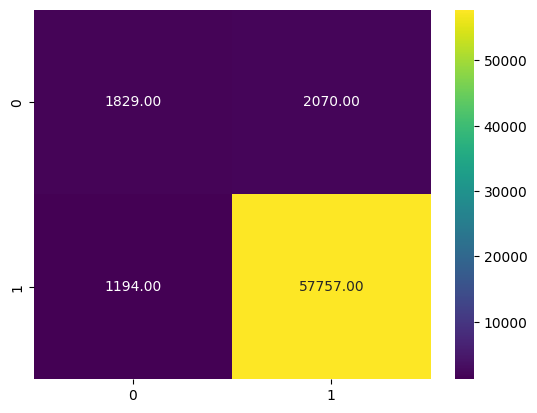

In [50]:
# Calculate metrics
accuracy = accuracy_score(y_test_encoded, rf_y_pred)
precision = precision_score(y_test_encoded, rf_y_pred)
recall = recall_score(y_test_encoded, rf_y_pred)
f1 = f1_score(y_test_encoded, rf_y_pred)

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

print(metrics_df)

# Create a DataFrame for the confusion matrix
rf_conf_matrix = confusion_matrix(y_test_encoded, rf_y_pred)
rf_conf_matrix_df = pd.DataFrame(rf_conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

sns.heatmap(rf_conf_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.show()

## 2. **XGBClassifier**

In [51]:
# Initialize the XGBClassifier
xgb = XGBClassifier(n_estimators=100, random_state=0)

# Set up k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Evaluate the model using cross-validation
cv_results = cross_val_score(xgb, X_train_processed, y_train_resampled, cv=kfold, scoring='accuracy')
print(f"Cross-validation scores: {cv_results}")
print(f"Mean cross-validation score: {cv_results.mean()}")

# Fit the model on the entire training data
xgb.fit(X_train_processed, y_train_resampled)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test_processed)


Cross-validation scores: [0.97061069 0.97113777 0.97064704 0.97304617 0.97048346]
Mean cross-validation score: 0.9711850236277717


      Metric     Score
0   Accuracy  0.950772
1  Precision  0.969016
2     Recall  0.978813
3   F1 Score  0.973890


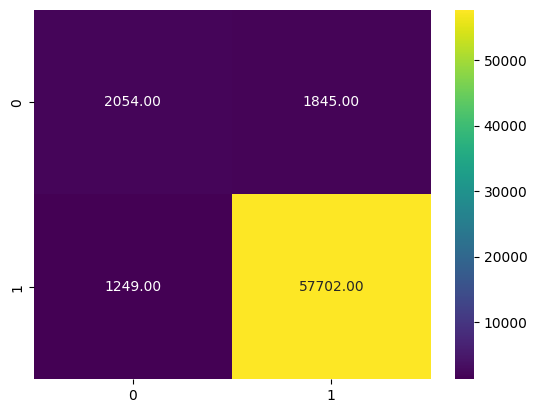

In [52]:
# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
precision = precision_score(y_test_encoded, y_pred_xgb)
recall = recall_score(y_test_encoded, y_pred_xgb)
f1 = f1_score(y_test_encoded, y_pred_xgb)

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

print(metrics_df)

# Create a DataFrame for the confusion matrix
xgb_conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)
xgb_conf_matrix_df = pd.DataFrame(xgb_conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

sns.heatmap(xgb_conf_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.show()

## 3. **Logistic Regressor**

In [53]:
# Instantiate the logistic regression
log_reg = LogisticRegression(random_state=42)

# Fit the model
log_reg.fit(X_train_processed, y_train_resampled)

# Predict on the test set
y_pred_log = log_reg.predict(X_test_processed)


      Metric     Score
0   Accuracy  0.845091
1  Precision  0.988991
2     Recall  0.844244
3   F1 Score  0.910903


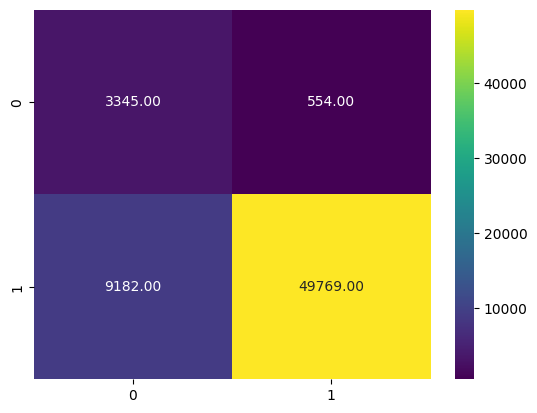

In [54]:
# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_pred_log)
precision = precision_score(y_test_encoded, y_pred_log)
recall = recall_score(y_test_encoded, y_pred_log)
f1 = f1_score(y_test_encoded, y_pred_log)

# Create a DataFrame with the metrics

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

print(metrics_df)

# Create a DataFrame for the confusion matrix   
log_conf_matrix = confusion_matrix(y_test_encoded, y_pred_log)
log_conf_matrix_df = pd.DataFrame(log_conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

sns.heatmap(log_conf_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.show()

## 4. **Naive Bayes**

In [55]:
# Check if X_train_processed and X_test_processed are sparse and convert to dense if needed
if hasattr(X_train_processed, 'toarray'):
    X_train_processed = X_train_processed.toarray()

if hasattr(X_test_processed, 'toarray'):
    X_test_processed = X_test_processed.toarray()

# Instantiate Naive Bayes
nb = GaussianNB()

# Fit the model
nb.fit(X_train_processed, y_train_resampled)

# Predict on the test set
y_pred_nb = nb.predict(X_test_processed)

      Metric     Score
0   Accuracy  0.709117
1  Precision  0.993688
2     Recall  0.694288
3   F1 Score  0.817436


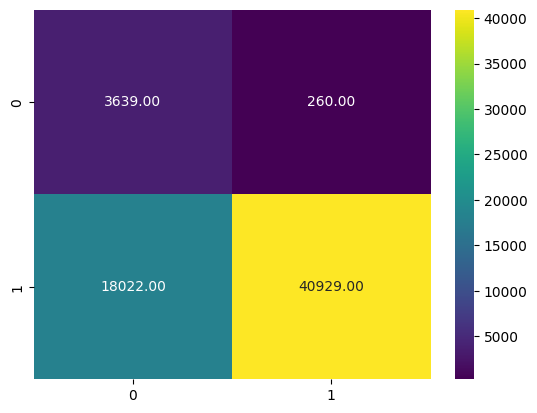

In [56]:
# Calculate Metrics

accuracy = accuracy_score(y_test_encoded, y_pred_nb)
precision = precision_score(y_test_encoded, y_pred_nb)
recall = recall_score(y_test_encoded, y_pred_nb)
f1 = f1_score(y_test_encoded, y_pred_nb)

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

print(metrics_df)

# Create a DataFrame for the confusion matrix
nb_conf_matrix = confusion_matrix(y_test_encoded, y_pred_nb)
nb_conf_matrix_df = pd.DataFrame(nb_conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

sns.heatmap(nb_conf_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.show()

## 5. **Decision Tree**

In [57]:
# Instantiate Decision Tree
dt = tree.DecisionTreeClassifier(random_state=42)

# Fit the model
dt.fit(X_train_processed, y_train_resampled)

# Predict on the test set
y_pred_dt = dt.predict(X_test_processed)

      Metric     Score
0   Accuracy  0.927208
1  Precision  0.964991
2     Recall  0.957117
3   F1 Score  0.961038


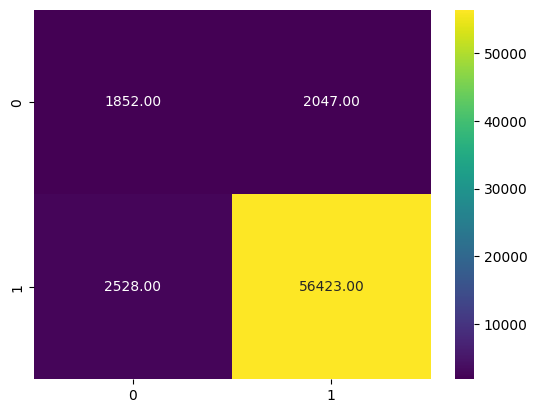

In [58]:
# Calculate Metrics
accuracy = accuracy_score(y_test_encoded, y_pred_dt)
precision = precision_score(y_test_encoded, y_pred_dt)
recall = recall_score(y_test_encoded, y_pred_dt)
f1 = f1_score(y_test_encoded, y_pred_dt)

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

print(metrics_df)

# Create a DataFrame for the confusion matrix
dt_conf_matrix = confusion_matrix(y_test_encoded, y_pred_dt)
dt_conf_matrix_df = pd.DataFrame(dt_conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

sns.heatmap(dt_conf_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.show()

## 6. **KNeighborsClassifier**

In [59]:
# Instantiate support KNEIGHBOURS
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train_processed, y_train_resampled)

# Predict on the test set
y_pred_knn = knn.predict(X_test_processed)

      Metric     Score
0   Accuracy  0.871663
1  Precision  0.981656
2     Recall  0.879612
3   F1 Score  0.927837


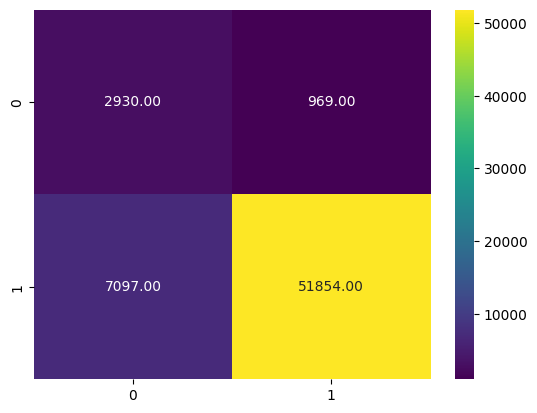

In [60]:
# Calculate Metrics
accuracy = accuracy_score(y_test_encoded, y_pred_knn)
precision = precision_score(y_test_encoded, y_pred_knn)
recall = recall_score(y_test_encoded, y_pred_knn)
f1 = f1_score(y_test_encoded, y_pred_knn)

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

print(metrics_df)

# Create a DataFrame for the confusion matrix
knn_conf_matrix = confusion_matrix(y_test_encoded, y_pred_knn)
knn_conf_matrix_df = pd.DataFrame(knn_conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

sns.heatmap(knn_conf_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.show()

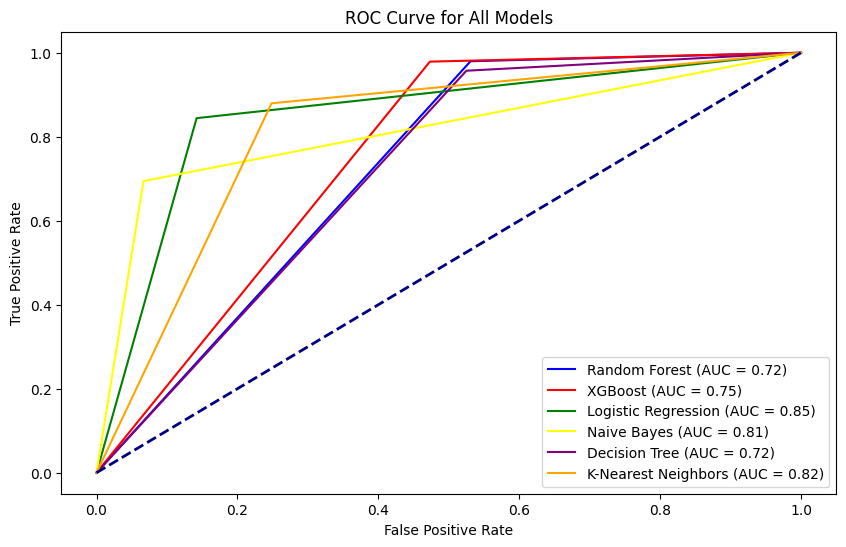

In [61]:
# Model predictions
model_preds = {
    'Random Forest': rf_y_pred,
    'XGBoost': y_pred_xgb,
    'Logistic Regression': y_pred_log,
    'Naive Bayes': y_pred_nb,
    'Decision Tree': y_pred_dt,
    'K-Nearest Neighbors': y_pred_knn
}

# Plotting
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'yellow', 'purple', 'orange']

for (label, y_pred), color in zip(model_preds.items(), colors):
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})', color=color)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.show()


## **Notes**:
- After training, and after considering our evaluation metric, the best performing models are XGBclassifier(F1-Score = 0.974) and RandomForestClassifier (F1-Score = 0.973)
- We will proceed with these models for hyperparameter tuning and the ultimate deployment
- Something to note is that the entire training was done on a balanced dataset

## **Hyperparameter Tuning**

### **1. Tuning XGBClassifier**

In [62]:
xgb_pipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=5, sampling_strategy='auto')),
    ('model', XGBClassifier(random_state=0, n_estimators=100))
])

# Define a simplified parameter grid for hyperparameter tuning with random search
param_dist = {
    'model__n_estimators': randint(50, 150),
    'model__max_depth': randint(3, 7),
    'model__learning_rate': uniform(0.05, 0.15),
    'model__subsample': uniform(0.7, 0.3),
}

# Perform random search
random_search_xgb = RandomizedSearchCV(xgb_pipeline, param_distributions=param_dist, n_iter=30, cv=3, scoring='f1', n_jobs=-1, verbose=2, random_state=42)
random_search_xgb.fit(X_train, y_train_encoded)

# Print the best parameters and the best score
print("Best parameters found: ", random_search_xgb.best_params_)
print("Best F1 score: ", random_search_xgb.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found:  {'model__learning_rate': np.float64(0.19478829608962067), 'model__max_depth': 6, 'model__n_estimators': 90, 'model__subsample': np.float64(0.7888820517112247)}
Best F1 score:  0.9734321987794257


### Notes:
- After hyperparameter tuning, the XGBClassifier model achieved a new F1-Score of 0.973.
- This is slightly lower than the initial F1-Score.
- Therefore, the hyperparameter tuning did not significantly improve the model's performance, and we have considered using the original model configuration

### **2. Tuning RandomForestClassifier**

In [63]:
# Tuning RandomForestClassifier
rf_pipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=5, sampling_strategy='auto')),
    ('model', RandomForestClassifier(random_state=0))
])

# Define a simplified parameter grid for hyperparameter tuning with random search
param_dist = {
    'model__n_estimators': randint(50, 200),
    'model__max_depth': randint(3, 7),
    'model__min_samples_split': randint(2, 10),
    'model__min_samples_leaf': randint(1, 4),
}

# Create a subset of the training data
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train_encoded, train_size=0.5, random_state=42)

# Perform random search
random_search_rf = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist, n_iter=30, cv=3, scoring='f1', n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X_train_sub, y_train_sub)

# Print the best parameters and the best score
print("Best parameters found: ", random_search_rf.best_params_)
print("Best F1 score: ", random_search_rf.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found:  {'model__max_depth': 6, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5, 'model__n_estimators': 113}
Best F1 score:  0.9057782332802553


### Notes:
- After hyperparameter tuning, the RandomForestClassifier model achieved a new F1-Score of 0.906.
- This is slightly lower than the initial F1-Score.
- Therefore, the hyperparameter tuning did not significantly improve the model's performance, and we have considered using the original model configuration.

In [64]:
# Get the original Models configurations into single complete pipelines
xgb_final_pipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=5, sampling_strategy='auto')),
    ('model', XGBClassifier(random_state=0, n_estimators=100))
])

rf_final_pipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=5, sampling_strategy='auto')),
    ('model', RandomForestClassifier(random_state=0))
])

In [65]:
# fit the complete pipelnes
xgb_final_pipeline.fit(X_train, y_train_encoded)
rf_final_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'industry_code', 'occupation_code', 'total_employed', 'vet_benefit',
       'gains', 'losses', 'stocks_status', 'mig_year', 'importance_of_record']...
                                                  Index(['gender', 'education', 'marital_status', 'race', 'is_hispanic',
       'employment_commitment', 'industry_code_main', 'household_stat',
       'household_summary', 'tax_status', 'citizenship',
       'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier(random_state=0))])

## **`Model Evaluation`**

### **Saving Models**

In [66]:
# Create 'toolkit' directory if it doesn't exist
os.makedirs('toolkit', exist_ok=True)

# Define file paths
xgb_model_path = 'toolkit/xgb_model.joblib'
rf_model_path = 'toolkit/rf_model.joblib'
label_encoder_path = 'toolkit/label_encoder.joblib'

# Save the XGBoost model if it doesn't already exist
if not os.path.exists(xgb_model_path):
    joblib.dump(xgb_final_pipeline, xgb_model_path)
    print(f"XGBoost model saved to {xgb_model_path}")
else:
    print(f"XGBoost model already exists at {xgb_model_path}")

# Save the Random Forest model if it doesn't already exist
if not os.path.exists(rf_model_path):
    joblib.dump(rf_final_pipeline, rf_model_path)
    print(f"Random Forest model saved to {rf_model_path}")
else:
    print(f"Random Forest model already exists at {rf_model_path}")

# Save the Label Encoder if it doesn't already exist
if not os.path.exists(label_encoder_path):
    joblib.dump(label_encoder, label_encoder_path)
    print(f"Label encoder saved to {label_encoder_path}")
else:
    print(f"Label encoder already exists at {label_encoder_path}")



XGBoost model already exists at toolkit/xgb_model.joblib
Random Forest model already exists at toolkit/rf_model.joblib
Label encoder already exists at toolkit/label_encoder.joblib


### **Load Test Data**

In [67]:
# Load test Data
test_df = pd.read_csv("Data\Income Prediction Test Data.csv")
 
test_df.head(4)

ID  age   gender                    education     class  \
0  ID_TZ209499   54     Male         High school graduate   Private   
1  ID_TZ209500   53     Male             5th or 6th grade   Private   
2  ID_TZ209501   42     Male   Bachelors degree(BA AB BS)   Private   
3  ID_TZ209502   16   Female                    9th grade       NaN   

  education_institute                    marital_status    race  \
0                 NaN   Married-civilian spouse present   White   
1                 NaN   Married-civilian spouse present   White   
2                 NaN   Married-civilian spouse present   White   
3         High school                     Never married   White   

                  is_hispanic      employment_commitment  ...  \
0                   All other   Children or Armed Forces  ...   
1   Central or South American        Full-time schedules  ...   
2                   All other        Full-time schedules  ...   
3                   All other   Children or Armed Forces  ...   

  country_of_birth_father  country_of_birth_mother  \
0                      US                       US   
1             El-Salvador              El-Salvador   
2                      US                       US   
3                      US                       US   

   migration_code_change_in_msa migration_prev_sunbelt  \
0                     unchanged                    NaN   
1                             ?                      ?   
2                             ?                      ?   
3                     unchanged                    NaN   

   migration_code_move_within_reg  migration_code_change_in_reg  \
0                       unchanged                     unchanged   
1                               ?                             ?   
2                               ?                             ?   
3                       unchanged                     unchanged   

  residence_1_year_ago  old_residence_reg old_residence_state  \
0                 Same                NaN                 NaN   
1                  NaN                NaN                 NaN   
2                  NaN                NaN                 NaN   
3                 Same                NaN                 NaN   

   importance_of_record  
0               3388.96  
1               1177.55  
2               4898.55  
3               1391.44  

[4 rows x 42 columns]

In [68]:
# Check test data information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89786 entries, 0 to 89785
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              89786 non-null  object 
 1   age                             89786 non-null  int64  
 2   gender                          89786 non-null  object 
 3   education                       89786 non-null  object 
 4   class                           44707 non-null  object 
 5   education_institute             5616 non-null   object 
 6   marital_status                  89786 non-null  object 
 7   race                            89786 non-null  object 
 8   is_hispanic                     89786 non-null  object 
 9   employment_commitment           89786 non-null  object 
 10  unemployment_reason             2680 non-null   object 
 11  employment_stat                 89786 non-null  int64  
 12  wage_per_hour                   

In [69]:
# Prepare test data to match train data
columns_to_drop = [
    'ID', 'class', 'education_institute', 'unemployment_reason', 'is_labor_union',
    'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 
    'migration_prev_sunbelt', 'migration_code_move_within_reg',
    'migration_code_change_in_reg', 'residence_1_year_ago', 'old_residence_reg',
    'old_residence_state'
]

test_df = test_df.drop(columns=columns_to_drop)


In [70]:
# Select only categorical columns
test_cat_cols = test_df.select_dtypes(exclude=['number', 'float']).columns

# Strip leading and trailing spaces in all categorical columns
test_df[test_cat_cols] = test_df[test_cat_cols].applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [71]:
# Strip the ?
columns_to_strip = [
    'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother'
]

for column in columns_to_strip:
    train_df[column] = train_df[column].replace('?', np.nan)

In [72]:
# Replace 'NA' in is_hispanic with 'all_other'
train_df['is_hispanic'] = train_df['is_hispanic'].replace('NA', 'All other')

### **Load Models and Predict**

In [73]:
# Load models and predict
xgb_model = joblib.load(r'toolkit\xgb_model.joblib')
rf_model = joblib.load(r'toolkit\rf_model.joblib')

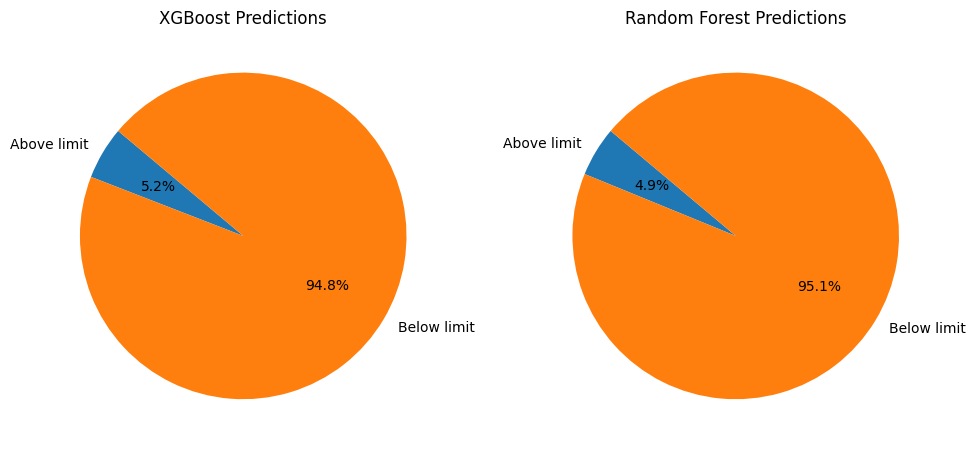

In [74]:
# Predict with models
xgb_predictions = xgb_model.predict(test_df)
rf_predictions = rf_model.predict(test_df)

# Convert predictions back to original labels
xgb_labels = label_encoder.inverse_transform(xgb_predictions)
rf_labels = label_encoder.inverse_transform(rf_predictions)

# Get counts of each label
def get_label_counts(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    return unique_labels, counts

# Create explode array to pop out "Above Limit" slice
def get_explode(labels):
    return [0.1 if label == 'Above Limit' else 0 for label in labels]

# Prepare data for plotting
xgb_labels, xgb_counts = get_label_counts(xgb_labels)
rf_labels, rf_counts = get_label_counts(rf_labels)

xgb_explode = get_explode(xgb_labels)
rf_explode = get_explode(rf_labels)

# Plot pie charts
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot XGBoost pie chart
ax[0].pie(xgb_counts, labels=xgb_labels, autopct='%1.1f%%', explode=xgb_explode, startangle=140)
ax[0].set_title('XGBoost Predictions')

# Plot Random Forest pie chart
ax[1].pie(rf_counts, labels=rf_labels, autopct='%1.1f%%', explode=rf_explode, startangle=140)
ax[1].set_title('Random Forest Predictions')

plt.tight_layout()
plt.show()

In [75]:
y_normalized = pd.Series(y_train_resampled)

y_normalized = y_normalized.value_counts(normalize=True)

y_normalized

1    0.5
0    0.5
Name: proportion, dtype: float64